In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import brier_score_loss, confusion_matrix, classification_report, average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRegressor

from statistics import mean
from sklearn import model_selection

from warnings import filterwarnings
filterwarnings('ignore')

# Data Overwiev

In [2]:
df = pd.read_csv("datafm20.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,...,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,...,14,4,1,16,14,18,13,6,2,15
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,...,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,...,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,...,17,3,1,14,14,16,18,10,4,17


In [4]:
df=df.iloc[:, 1:]

In [5]:
df.columns

Index(['Name', 'Position', 'Club', 'Division', 'Based', 'Nation', 'Height',
       'Weight', 'Age', 'Preferred Foot', 'Best Pos', 'Best Role', 'Value',
       'Wage', 'CA', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str',
       'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB',
       'Nat', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre',
       'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt',
       'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

In [6]:
# Dropping unnecessary columns

df.drop(columns=["Position", "Based", "Nation", "Best Role", "Value", "Wage", "L Th"], inplace=True)

df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,Barcelona,Spanish First Division,170,72,32,Left,AM (R),195,200,...,18,2,2,10,19,19,19,7,2,18
1,Cristiano Ronaldo,Juventus,Italian Serie A,185,83,34,Either,ST (C),195,196,...,14,4,1,16,14,18,13,6,2,15
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,18,2,1,12,14,17,16,6,4,20
3,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,20,12,17,14,14,19,15,8,14,13
4,Neymar,Paris SG,Ligue 1 Conforama,175,68,27,Right,AM (L),186,190,...,17,3,1,14,14,16,18,10,4,17


In [7]:
''' 
If the players current ability is less than 100 we will not use it in our models. 
Because generally we can inference whether the players  current ability is greater than 100 to look at his profile.

And same for potential ability

'''

df = df[df["PA"]>130]

df = df[df["CA"]>100]

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
df.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,Barcelona,Spanish First Division,170,72,32,Left,AM (R),195,200,...,18,2,2,10,19,19,19,7,2,18
1,Cristiano Ronaldo,Juventus,Italian Serie A,185,83,34,Either,ST (C),195,196,...,14,4,1,16,14,18,13,6,2,15
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,18,2,1,12,14,17,16,6,4,20
3,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,20,12,17,14,14,19,15,8,14,13
4,Neymar,Paris SG,Ligue 1 Conforama,175,68,27,Right,AM (L),186,190,...,17,3,1,14,14,16,18,10,4,17


In [10]:
df["P_Quality"] = df["PA"]

In [11]:
'''
We encoded player as high level player if his potential ability bigger than 150 else we encoded low level player.

'''

for i in range(len(df)):
    if df["PA"][i]>=150:
        df["P_Quality"][i]="High_Level"
    else:
        df["P_Quality"][i]="Low_Level"

In [12]:
'''

We encoded player as high level player if his current ability bigger than 125 else we encoded low level player.

'''

df["C_Quality"] = df["CA"]

for i in range(len(df)):
    if df["CA"][i]>=125:
        df["C_Quality"][i]="High_Level"
    else:
        df["C_Quality"][i]="Low_Level"

In [13]:
# P_Quality-C_Quality Low:0 High:1

df['P_Quality'].loc[df['P_Quality'] == 'Low_Level'] = 0
df['C_Quality'].loc[df['C_Quality'] == 'High_Level'] = 1
df['P_Quality'].loc[df['P_Quality'] == 'High_Level'] = 1
df['C_Quality'].loc[df['C_Quality'] == 'Low_Level'] = 0

In [14]:
df.sample(5)

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality
3490,Joey Veerman,sc Heerenveen,Eredivisie,185,78,20,Right,M (C),119,139,...,3,13,13,10,13,11,1,11,0,0
1114,Strahinja Pavlovic,Partizan,Serbian SuperLeague,194,94,18,Left,D (C),120,151,...,1,15,14,13,11,14,3,11,1,0
4701,Cristian Arrieta,AmÃ©rica de Cali,Colombian First Division,175,70,23,Right,D (R),120,135,...,1,12,11,10,11,13,3,14,0,0
1876,Dalbert,Rennes,Ligue 1 Conforama,181,74,25,Left,D (L),134,145,...,1,14,11,12,15,11,1,16,0,1
5189,Neyder Lozano,Granada,Spanish First Division,185,82,25,Left,D (C),120,135,...,2,13,12,12,10,6,2,11,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            6808 non-null   object
 1   Club            6808 non-null   object
 2   Division        6808 non-null   object
 3   Height          6808 non-null   int64 
 4   Weight          6808 non-null   int64 
 5   Age             6808 non-null   int64 
 6   Preferred Foot  6808 non-null   object
 7   Best Pos        6808 non-null   object
 8   CA              6808 non-null   int64 
 9   PA              6808 non-null   int64 
 10  Wor             6808 non-null   int64 
 11  Vis             6808 non-null   int64 
 12  Thr             6808 non-null   int64 
 13  Tec             6808 non-null   int64 
 14  Tea             6808 non-null   int64 
 15  Tck             6808 non-null   int64 
 16  Str             6808 non-null   int64 
 17  Sta             6808 non-null   int64 
 18  TRO     

In [16]:
df["P_Quality"]=df["P_Quality"].astype("int32")
df["C_Quality"]=df["C_Quality"].astype("int32")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            6808 non-null   object
 1   Club            6808 non-null   object
 2   Division        6808 non-null   object
 3   Height          6808 non-null   int64 
 4   Weight          6808 non-null   int64 
 5   Age             6808 non-null   int64 
 6   Preferred Foot  6808 non-null   object
 7   Best Pos        6808 non-null   object
 8   CA              6808 non-null   int64 
 9   PA              6808 non-null   int64 
 10  Wor             6808 non-null   int64 
 11  Vis             6808 non-null   int64 
 12  Thr             6808 non-null   int64 
 13  Tec             6808 non-null   int64 
 14  Tea             6808 non-null   int64 
 15  Tck             6808 non-null   int64 
 16  Str             6808 non-null   int64 
 17  Sta             6808 non-null   int64 
 18  TRO     

In [18]:
df["Best Pos"].unique()

array(['AM (R)', 'ST (C)', 'GK', 'AM (L)', 'M (C)', 'D (C)', 'M (R)',
       'DM', 'AM (C)', 'M (L)', 'D (R)', 'D (L)', 'WB (R)', 'WB (L)'],
      dtype=object)

In [19]:
goalkeepers = df[df["Best Pos"] == "GK"]
goalkeepers.reset_index(inplace=True, drop=True)

In [20]:
goalkeepers.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality
0,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,17,14,14,19,15,8,14,13,1,1
1,Gianluigi Buffon,Juventus,Italian Serie A,192,92,41,Right Only,GK,156,187,...,20,17,13,17,7,5,14,6,1,1
2,Marc-AndrÃ© ter Stegen,Barcelona,Spanish First Division,187,85,27,Either,GK,170,183,...,15,15,16,17,14,11,13,14,1,1
3,Thibaut Courtois,R. Madrid,Spanish First Division,199,96,27,Left,GK,162,183,...,16,13,14,15,12,8,18,11,1,1
4,Gianluigi Donnarumma,Milan,Italian Serie A,196,90,20,Right Only,GK,160,182,...,15,15,16,16,16,8,16,9,1,1


In [21]:
goalkeepers.drop(columns=["Tec", "Tck", "Pen", "Pas", "Mar", "Lon", "Hea", "Fre", "Fla", "Fin",
                                        "Dri", "Cro", "Cor"], inplace=True)

In [22]:
goalkeepers.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality
0,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,17,14,14,19,15,8,14,13,1,1
1,Gianluigi Buffon,Juventus,Italian Serie A,192,92,41,Right Only,GK,156,187,...,20,17,13,17,7,5,14,6,1,1
2,Marc-AndrÃ© ter Stegen,Barcelona,Spanish First Division,187,85,27,Either,GK,170,183,...,15,15,16,17,14,11,13,14,1,1
3,Thibaut Courtois,R. Madrid,Spanish First Division,199,96,27,Left,GK,162,183,...,16,13,14,15,12,8,18,11,1,1
4,Gianluigi Donnarumma,Milan,Italian Serie A,196,90,20,Right Only,GK,160,182,...,15,15,16,16,16,8,16,9,1,1


In [23]:
forwards = df[(df["Best Pos"] == "AM (R)") | (df["Best Pos"] == "AM (L)") | (df["Best Pos"] == "ST (C)") | (df["Best Pos"] == "M (L)") | (df["Best Pos"] == "M (R)")]

In [24]:
forwards.reset_index(inplace=True, drop=True)

In [25]:
forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

In [26]:
forwards.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Lionel Messi,Barcelona,Spanish First Division,170,72,32,Left,AM (R),195,200,...,13,18,10,19,19,19,7,18,1,1
1,Cristiano Ronaldo,Juventus,Italian Serie A,185,83,34,Either,ST (C),195,196,...,16,14,16,14,18,13,6,15,1,1
2,Kylian MbappÃ©,Paris SG,Ligue 1 Conforama,178,73,20,Right,ST (C),181,196,...,13,18,12,14,17,16,6,20,1,1
3,Neymar,Paris SG,Ligue 1 Conforama,175,68,27,Right,AM (L),186,190,...,10,17,14,14,16,18,10,17,1,1
4,Erling Haaland,Borussia Dortmund,Bundesliga,194,87,18,Left,ST (C),166,189,...,13,17,14,17,16,14,13,15,1,1


In [27]:
midfielders = df[(df["Best Pos"] == "M (C)") | (df["Best Pos"] == "AM (C)") | (df["Best Pos"] == "DM")]

In [28]:
midfielders.reset_index(inplace=True, drop=True)

In [29]:
midfielders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [30]:
midfielders.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Kevin De Bruyne,Man City,English Premier Division,181,70,27,Either,M (C),188,188,...,15,15,14,14,13,13,12,15,1,1
1,AndrÃ©s Iniesta,Kobe Leone,Nihon-League 1,171,68,35,Either,M (C),154,183,...,15,18,10,11,18,9,8,10,1,1
2,Frenkie de Jong,Barcelona,Spanish First Division,181,69,22,Right,M (C),164,183,...,15,16,13,13,17,16,7,14,1,1
3,Cesc FÃ bregas,AS Monaco,Ligue 1 Conforama,179,76,32,Right,M (C),136,180,...,13,17,12,13,16,11,11,8,1,1
4,Declan Rice,West Ham,English Premier Division,185,80,20,Right,DM,138,180,...,13,17,14,13,14,13,12,12,1,1


In [31]:
defenders = df[(df["Best Pos"] == "D (C)")]

In [32]:
defenders.reset_index(inplace=True, drop=True)

In [33]:
defenders.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [34]:
defenders.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Virgil van Dijk,Liverpool,English Premier Division,193,92,27,Right,D (C),180,184,...,17,16,15,15,16,12,17,16,1,1
1,JÃ©rÃ´me Boateng,FC Bayern,Bundesliga,192,90,30,Either,D (C),156,175,...,13,17,13,15,17,10,9,11,1,1
2,Ravil Tagir,AltÄ±nordu,Turkish 1. League,182,70,16,Left,D (C),101,175,...,13,15,10,11,11,13,10,10,1,0
3,Giorgio Chiellini,Juventus,Italian Serie A,187,85,34,Left Only,D (C),168,174,...,17,16,20,16,17,10,16,10,1,1
4,Sergio Ramos,R. Madrid,Spanish First Division,184,83,33,Right,D (C),172,174,...,10,13,17,15,17,15,18,13,1,1


In [35]:
backs = df[(df["Best Pos"] == "D (R)") | (df["Best Pos"] == "D (L)") | (df["Best Pos"] == "WB (L)") | (df["Best Pos"] == "WB (R)")]

In [36]:
backs.reset_index(inplace=True, drop=True)

In [37]:
backs.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer"], inplace=True)

In [38]:
backs.head()

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,Trent Alexander-Arnold,Liverpool,English Premier Division,180,70,20,Right,D (R),159,178,...,13,15,14,14,15,14,15,14,1,1
1,Maicon,Unknown,Hong Kong Premier League,186,82,37,Right,D (R),102,175,...,7,4,7,7,6,14,8,12,1,0
2,Daniel Alves,SÃ£o Paulo,Brazilian National First Division,170,68,36,Right,D (R),155,174,...,12,16,17,12,15,12,17,14,1,1
3,David Alaba,FC Bayern,Bundesliga,178,72,27,Left,D (L),168,174,...,16,15,13,14,16,14,13,16,1,1
4,Joshua Kimmich,FC Bayern,Bundesliga,176,70,24,Right,D (R),171,173,...,14,15,14,13,17,15,12,13,1,1


In [39]:
df.isnull().sum()

Name              0
Club              0
Division          0
Height            0
Weight            0
Age               0
Preferred Foot    0
Best Pos          0
CA                0
PA                0
Wor               0
Vis               0
Thr               0
Tec               0
Tea               0
Tck               0
Str               0
Sta               0
TRO               0
Ref               0
Pun               0
Pos               0
Pen               0
Pas               0
Pac               0
1v1               0
OtB               0
Nat               0
Mar               0
Lon               0
Ldr               0
Kic               0
Jum               0
Hea               0
Han               0
Fre               0
Fla               0
Fir               0
Fin               0
Ecc               0
Dri               0
Det               0
Dec               0
Cro               0
Cor               0
Cnt               0
Cmp               0
Com               0
Cmd               0
Bra               0


In [40]:
# Dropping columns that we will not use in our models

forwards_model = forwards.drop(columns=["Name", "Club", "Division", "Best Pos"])

defenders_model = defenders.drop(columns=["Name", "Club", "Division", "Best Pos"])

backs_model = backs.drop(columns=["Name", "Club", "Division", "Best Pos"])

midfielders_model = midfielders.drop(columns=["Name", "Club", "Division", "Best Pos"])

goalkeepers_model = goalkeepers.drop(columns=["Name", "Club", "Division", "Best Pos"])

In [41]:
forwards_model.head()

,Height,Weight,Age,Preferred Foot,CA,PA,Wor,Vis,Tec,Tea,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality
0,170,72,32,Left,195,200,7,20,20,14,...,13,18,10,19,19,19,7,18,1,1
1,185,83,34,Either,195,196,10,14,17,10,...,16,14,16,14,18,13,6,15,1,1
2,178,73,20,Right,181,196,10,13,17,10,...,13,18,12,14,17,16,6,20,1,1
3,175,68,27,Right,186,190,10,16,20,8,...,10,17,14,14,16,18,10,17,1,1
4,194,87,18,Left,166,189,13,13,14,11,...,13,17,14,17,16,14,13,15,1,1


In [42]:
df.duplicated().sum()

0

In [43]:
# One-Hot Encoding

forwards_model = pd.get_dummies(forwards_model, columns = ["Preferred Foot"])

defenders_model = pd.get_dummies(defenders_model, columns = ["Preferred Foot"])

backs_model = pd.get_dummies(backs_model, columns = ["Preferred Foot"])

goalkeepers_model = pd.get_dummies(goalkeepers_model, columns = ["Preferred Foot"])

midfielders_model = pd.get_dummies(midfielders_model, columns = ["Preferred Foot"])

In [44]:
midfielders_model.head()

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Left Only,Preferred Foot_Right,Preferred Foot_Right Only
0,181,70,27,188,188,15,20,17,14,9,...,13,12,15,1,1,1,0,0,0,0
1,171,68,35,154,183,13,20,20,17,7,...,9,8,10,1,1,1,0,0,0,0
2,181,69,22,164,183,15,18,16,17,12,...,16,7,14,1,1,0,0,0,1,0
3,179,76,32,136,180,10,17,18,12,9,...,11,11,8,1,1,0,0,0,1,0
4,185,80,20,138,180,15,12,12,14,16,...,13,12,12,1,1,0,0,0,1,0


In [45]:
for i in range(len(forwards_model)):
    if forwards_model["Preferred Foot_Right Only"][i]==1:
        forwards_model["Preferred Foot_Right"][i]=1
    if forwards_model["Preferred Foot_Left Only"][i]==1:
        forwards_model["Preferred Foot_Left"][i]=1
        
forwards_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [46]:
for i in range(len(midfielders_model)):
    if midfielders_model["Preferred Foot_Right Only"][i]==1:
        midfielders_model["Preferred Foot_Right"][i]=1
    if midfielders_model["Preferred Foot_Left Only"][i]==1:
        midfielders_model["Preferred Foot_Left"][i]=1
        
midfielders_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [47]:
for i in range(len(defenders_model)):
    if defenders_model["Preferred Foot_Right Only"][i]==1:
        defenders_model["Preferred Foot_Right"][i]=1
    if defenders_model["Preferred Foot_Left Only"][i]==1:
        defenders_model["Preferred Foot_Left"][i]=1
        
defenders_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [48]:
for i in range(len(backs_model)):
    if backs_model["Preferred Foot_Right Only"][i]==1:
        backs_model["Preferred Foot_Right"][i]=1
    if backs_model["Preferred Foot_Left Only"][i]==1:
        backs_model["Preferred Foot_Left"][i]=1
        
backs_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [49]:
for i in range(len(goalkeepers_model)):
    if goalkeepers_model["Preferred Foot_Right Only"][i]==1:
        goalkeepers_model["Preferred Foot_Right"][i]=1
    if goalkeepers_model["Preferred Foot_Left Only"][i]==1:
        goalkeepers_model["Preferred Foot_Left"][i]=1
        
goalkeepers_model.drop(columns=["Preferred Foot_Left Only", "Preferred Foot_Right Only"], inplace=True)

In [50]:
midfielders_model.sample(5)

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Right
1524,170,69,29,115,135,14,12,13,13,9,...,12,13,12,11,11,0,0,0,0,1
964,174,70,30,115,140,12,14,15,13,8,...,12,13,14,8,11,0,0,0,0,1
1246,180,76,29,123,137,15,11,11,14,14,...,13,13,12,15,13,0,0,0,0,1
1859,171,68,21,119,132,12,13,12,12,13,...,13,12,12,11,13,0,0,0,0,1
697,184,81,20,112,145,13,12,12,13,10,...,10,12,11,10,12,0,0,0,0,1


In [51]:
for i in range(len(goalkeepers_model)):
    if goalkeepers_model["Preferred Foot_Either"][i]==1:
        goalkeepers_model["Preferred Foot_Right"][i]=1
        goalkeepers_model["Preferred Foot_Left"][i]=1
        
goalkeepers_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [52]:
for i in range(len(defenders_model)):
    if defenders_model["Preferred Foot_Either"][i]==1:
        defenders_model["Preferred Foot_Right"][i]=1
        defenders_model["Preferred Foot_Left"][i]=1
        
defenders_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [53]:
for i in range(len(backs_model)):
    if backs_model["Preferred Foot_Either"][i]==1:
        backs_model["Preferred Foot_Right"][i]=1
        backs_model["Preferred Foot_Left"][i]=1
        
backs_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [54]:
for i in range(len(midfielders_model)):
    if midfielders_model["Preferred Foot_Either"][i]==1:
        midfielders_model["Preferred Foot_Right"][i]=1
        midfielders_model["Preferred Foot_Left"][i]=1
        
midfielders_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [55]:
for i in range(len(forwards_model)):
    if forwards_model["Preferred Foot_Either"][i]==1:
        forwards_model["Preferred Foot_Right"][i]=1
        forwards_model["Preferred Foot_Left"][i]=1
        
forwards_model.drop(columns=["Preferred Foot_Either"], inplace=True)

In [56]:
midfielders_model.sample(7)

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
1118,185,77,20,126,139,13,15,14,15,13,...,12,14,13,12,11,11,0,1,0,1
24,172,67,22,157,173,15,16,16,15,12,...,12,16,17,14,10,14,1,1,0,1
1589,182,74,31,125,135,13,13,15,13,11,...,11,13,13,12,13,12,0,1,0,1
457,180,73,23,139,149,14,12,14,14,11,...,14,10,13,15,15,16,0,1,0,1
19,181,71,27,148,175,15,16,16,15,13,...,12,9,14,15,12,13,1,1,0,1
911,171,67,33,123,140,10,13,15,14,9,...,12,14,12,13,14,12,0,0,0,1
1989,180,77,36,105,131,15,11,12,15,14,...,16,15,11,10,17,9,0,0,0,1


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

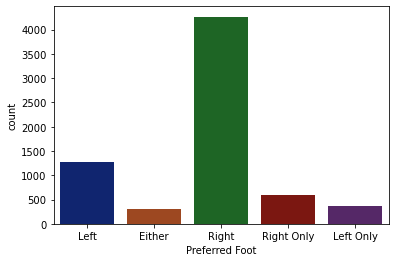

In [57]:
sns.countplot(df['Preferred Foot'], palette='dark')

<AxesSubplot:title={'center':'Goalkeepers Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

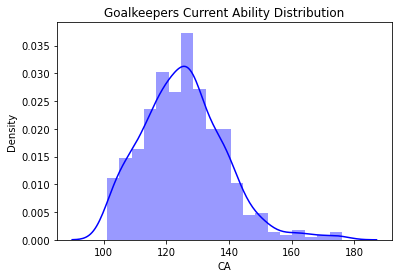

In [58]:
plt.title("Goalkeepers Current Ability Distribution")
sns.distplot(goalkeepers_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Defenders Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

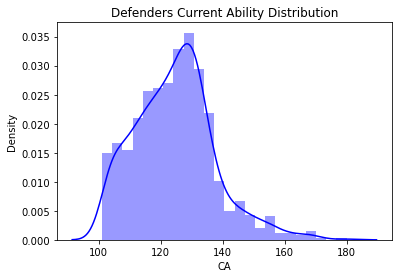

In [59]:
plt.title("Defenders Current Ability Distribution")
sns.distplot(defenders_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Backs Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

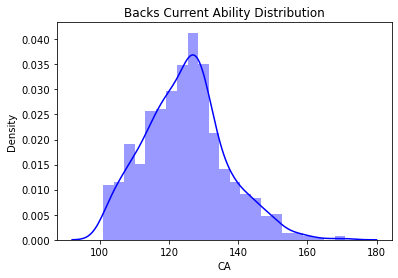

In [60]:
plt.title("Backs Current Ability Distribution")
sns.distplot(backs_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Midfielders Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

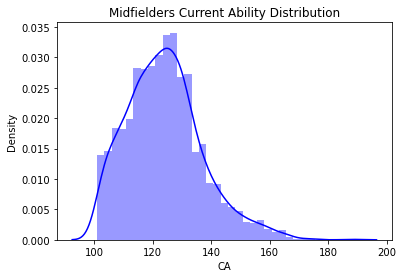

In [61]:
plt.title("Midfielders Current Ability Distribution")
sns.distplot(midfielders_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Forwards Current Ability Distribution'}, xlabel='CA', ylabel='Density'>

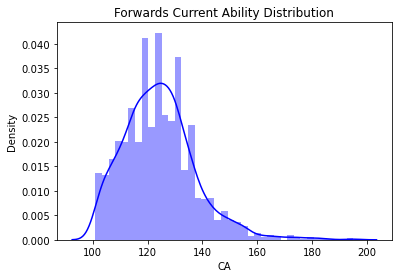

In [62]:
plt.title("Forwards Current Ability Distribution")
sns.distplot(forwards_model.CA, color = 'Blue')

<AxesSubplot:title={'center':'Goalkeepers Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

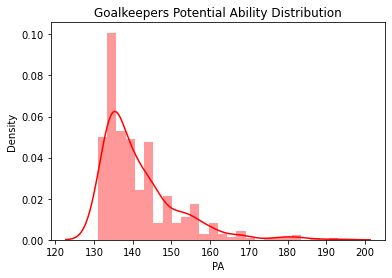

In [63]:
plt.title("Goalkeepers Potential Ability Distribution")
sns.distplot(goalkeepers_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Defenders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

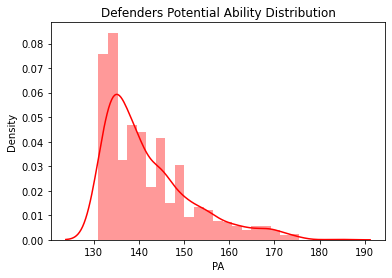

In [64]:
plt.title("Defenders Potential Ability Distribution")
sns.distplot(defenders_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Backs Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

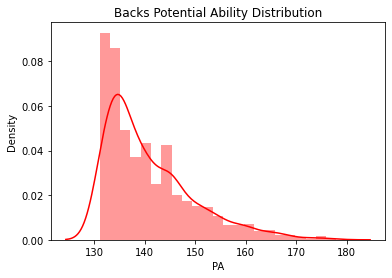

In [65]:
plt.title("Backs Potential Ability Distribution")
sns.distplot(backs_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Midfielders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

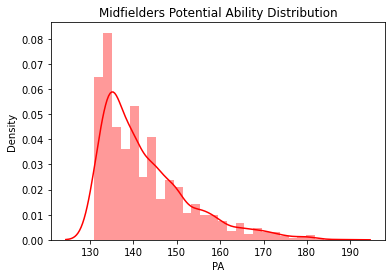

In [66]:
plt.title("Midfielders Potential Ability Distribution")
sns.distplot(midfielders_model.PA, color = 'Red')

<AxesSubplot:title={'center':'Forwards Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

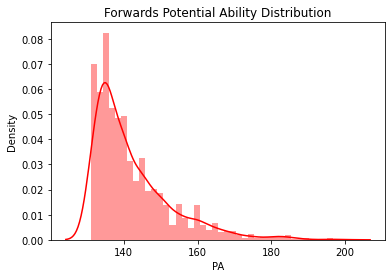

In [67]:
plt.title("Forwards Potential Ability Distribution")
sns.distplot(forwards_model.PA, color = 'Red')

In [68]:
goalkeepers_model.shape

(570, 42)

In [69]:
defenders_model.shape

(1056, 44)

In [70]:
backs_model.shape

(907, 44)

In [71]:
midfielders_model.shape

(2008, 44)

In [72]:
forwards_model.shape

(2267, 42)

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,6808.0,181.048325,6.918794,156.0,176.0,181.0,186.0,202.0
Weight,6808.0,75.153496,7.185598,55.0,70.0,75.0,80.0,103.0
Age,6808.0,26.009401,5.139988,14.0,22.0,25.0,30.0,46.0
CA,6808.0,124.369859,12.900705,101.0,115.0,124.0,131.0,195.0
PA,6808.0,142.066833,9.989804,131.0,135.0,139.0,146.0,200.0
Wor,6808.0,12.890276,2.360397,1.0,12.0,13.0,14.0,20.0
Vis,6808.0,11.425676,2.424303,1.0,10.0,12.0,13.0,20.0
Thr,6808.0,2.923766,3.019778,1.0,1.0,2.0,3.0,19.0
Tec,6808.0,12.413925,2.336078,1.0,11.0,13.0,14.0,20.0
Tea,6808.0,12.643801,2.299878,2.0,11.0,13.0,14.0,20.0


[Text(0.5, 1.0, 'Correlation Matrix')]

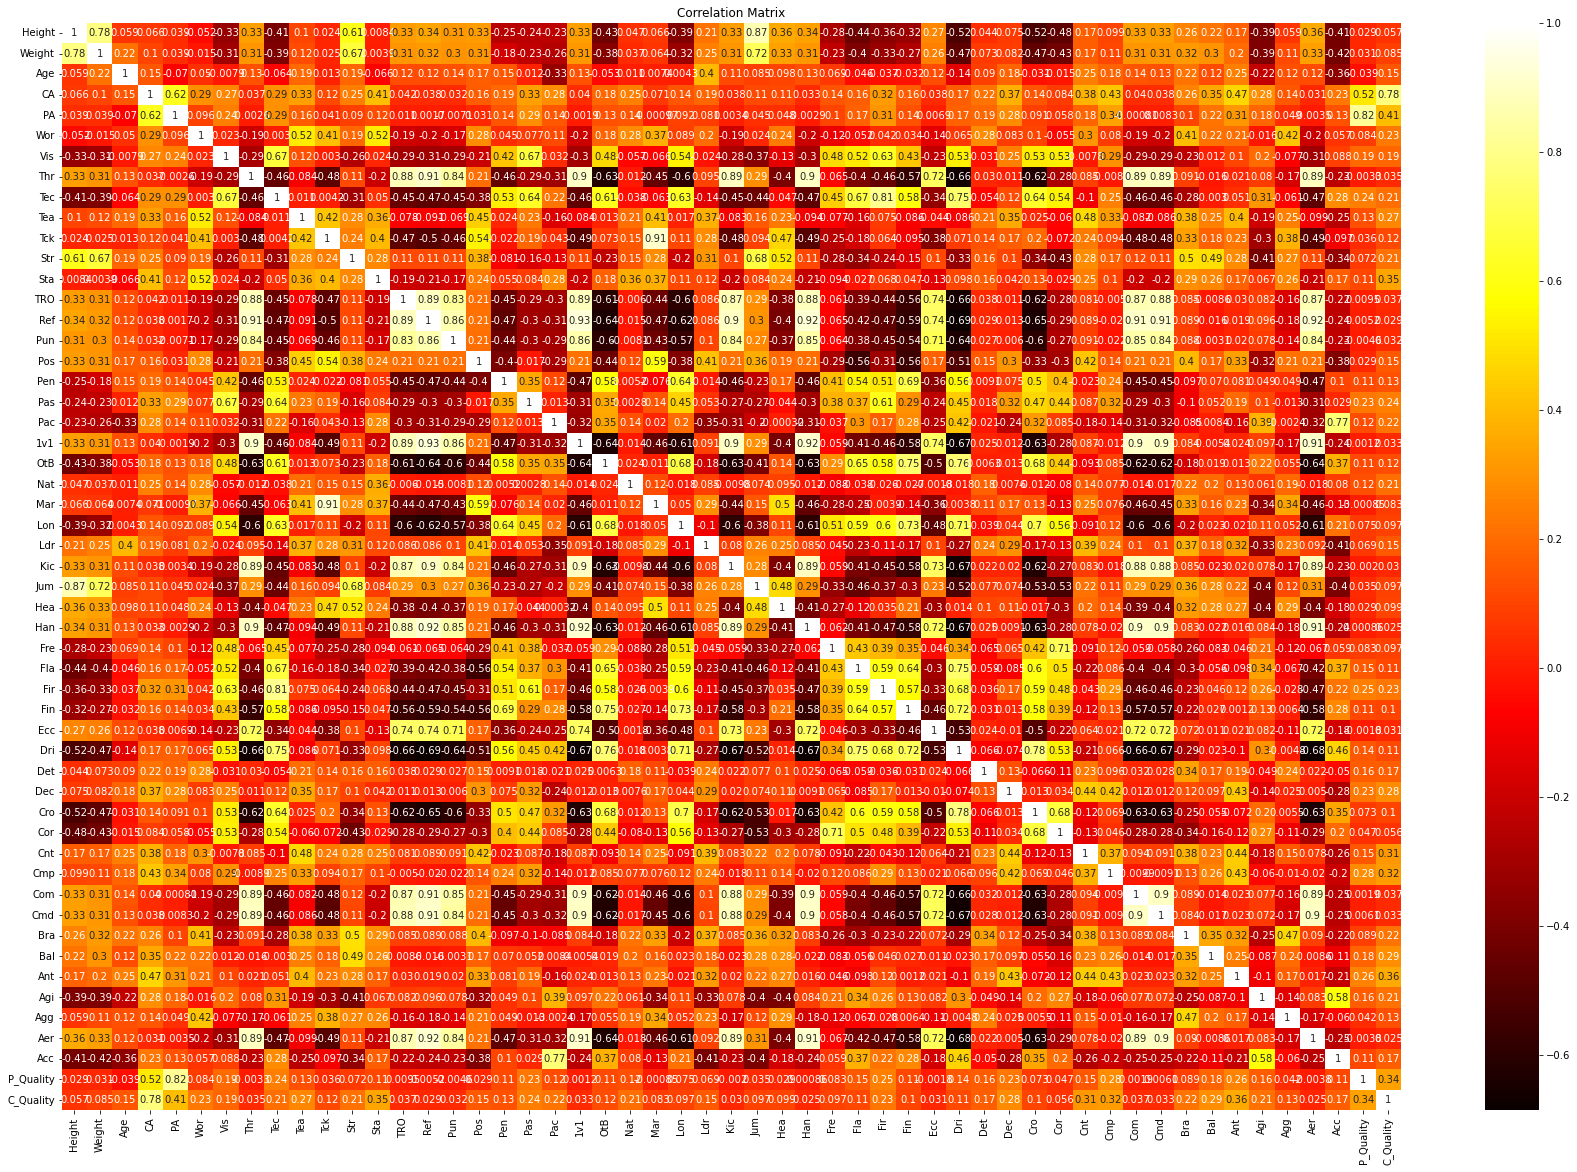

In [74]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

<AxesSubplot:title={'center':'Potential Ability'}, xlabel='P_Quality', ylabel='count'>

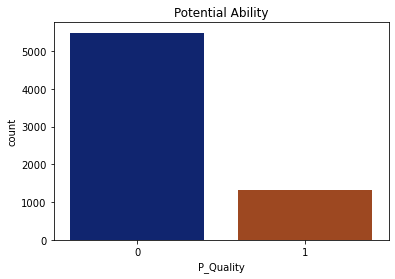

In [75]:
plt.title("Potential Ability")
sns.countplot(df["P_Quality"], palette='dark')

<AxesSubplot:title={'center':'Current Ability'}, xlabel='C_Quality', ylabel='count'>

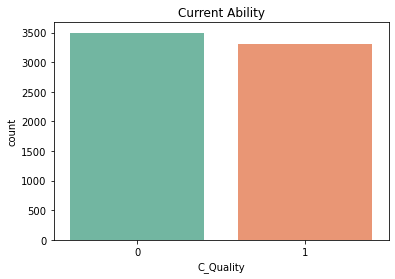

In [76]:
plt.title("Current Ability")
sns.countplot(df["C_Quality"], palette='Set2')

In [77]:
df.groupby("P_Quality").mean()

,Height,Weight,Age,CA,PA,Wor,Vis,Thr,Tec,Tea,...,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,C_Quality
P_Quality,,,,,,,,,,,,,,,,,,,,,
0,180.948222,75.045397,26.106655,121.100456,138.058341,12.792707,11.195442,2.928715,12.135460,12.497903,...,2.960802,2.941294,12.256153,12.073108,12.241933,12.458706,11.511577,3.040292,12.498086,0.403282
1,181.463341,75.601663,25.606198,137.924414,158.685563,13.294785,12.380197,2.903250,13.568405,13.248677,...,2.975057,2.987150,12.854119,13.076342,13.437642,13.239607,11.834467,3.009826,13.094482,0.829932


# Model

## Forwards

<AxesSubplot:title={'center':'Forwards Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

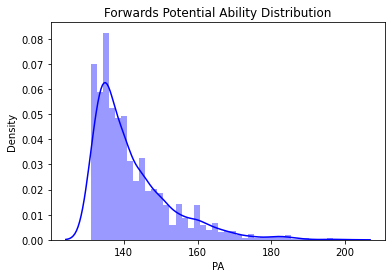

In [78]:
plt.title("Forwards Potential Ability Distribution")
sns.distplot(forwards_model.PA, color = 'Blue')

In [79]:
for i in range(len(forwards_model)):
    if forwards_model["CA"][i]>=125:
        forwards_model["C_Quality"][i]=1
    else:
        forwards_model["C_Quality"][i]=0



for i in range(len(forwards_model)):
    if forwards_model["PA"][i]>=150:
        forwards_model["P_Quality"][i]=1
    else:
        forwards_model["P_Quality"][i]=0

In [80]:
forwards_model.sample(7)

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Str,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
307,173,68,19,121,153,14,10,12,12,9,...,11,11,9,13,10,14,1,0,1,0
1182,172,68,32,132,138,17,11,13,10,8,...,13,13,14,13,13,15,0,1,0,1
1649,168,64,23,106,135,14,11,15,12,7,...,6,10,11,14,7,13,0,0,0,1
541,183,75,19,116,147,13,9,13,12,13,...,13,14,9,12,13,14,0,0,0,1
2228,175,73,34,101,131,6,11,12,7,7,...,8,11,11,13,7,12,0,0,0,1
1403,190,75,23,114,136,11,10,10,8,11,...,6,12,10,13,4,15,0,0,0,1
2226,175,65,28,116,131,11,12,13,9,7,...,13,8,13,15,11,15,0,0,0,1


In [81]:
forwards_model.columns

Index(['Height', 'Weight', 'Age', 'CA', 'PA', 'Wor', 'Vis', 'Tec', 'Tea',
       'Str', 'Sta', 'Pos', 'Pen', 'Pas', 'Pac', 'OtB', 'Nat', 'Lon', 'Ldr',
       'Jum', 'Hea', 'Fre', 'Fla', 'Fir', 'Fin', 'Dri', 'Det', 'Dec', 'Cro',
       'Cor', 'Cnt', 'Cmp', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Acc',
       'P_Quality', 'C_Quality', 'Preferred Foot_Left',
       'Preferred Foot_Right'],
      dtype='object')

In [82]:
forwards_model.corr()["P_Quality"].sort_values()

Pos                    -0.074722
Preferred Foot_Right   -0.028172
Age                    -0.021437
Hea                    -0.008494
Jum                     0.003890
Weight                  0.012441
Agg                     0.014768
Height                  0.019649
Str                     0.031997
Bra                     0.046843
Wor                     0.057140
Cor                     0.069439
Sta                     0.070488
Preferred Foot_Left     0.075167
Ldr                     0.082469
Tea                     0.085215
Nat                     0.090999
Cnt                     0.120132
Cro                     0.127079
Fre                     0.134523
Det                     0.150374
Pen                     0.157316
Pac                     0.163259
Lon                     0.166810
Bal                     0.169009
Acc                     0.170182
Agi                     0.191817
Dec                     0.209082
Fin                     0.224829
Vis                     0.233388
Ant       

In [83]:
x_forwards = forwards_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality", "Hea", "Jum"])
y_forwards_p =forwards_model["P_Quality"]

In [84]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_forwards, y_forwards_p, test_size=0.33, random_state=10)

### Classifying

#### Cat Boost Classifier

In [85]:
cb_forwards_p = CatBoostClassifier(verbose=False)
cb_forwards_p.fit(x_train_p, y_train_p)

In [86]:
cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p)

In [87]:
cb_forwards_p_cm = confusion_matrix(y_test_p, cb_forwards_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[575  15]
 [ 71  88]]


In [88]:
target_names=["Low Level", "High Level"]
print(classification_report(y_test_p, cb_forwards_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.89      0.97      0.93       590
  High Level       0.85      0.55      0.67       159

    accuracy                           0.89       749
   macro avg       0.87      0.76      0.80       749
weighted avg       0.88      0.89      0.88       749



In [89]:
'''
max_f1=0
best_i=0
for i in range(0,100):
    
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_forwards, y_forwards_p, test_size=0.33, random_state=i)
    cb_forwards_p = CatBoostClassifier(verbose=False)
    cb_forwards_p.fit(x_train_p, y_train_p)
    cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p)
    
    cb_forwards_p_cm = confusion_matrix(y_test_p, cb_forwards_p_predicts)
    p=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[0][1]+cb_forwards_p_cm[1][1]))
    r=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[1][0]+cb_forwards_p_cm[1][1]))
    f1=(2*p*r)/(p+r)
    if f1>max_f1:
        max_f1=f1
        best_i=i
        
print("Best f1 score for class 1:",max_f1, "\nbest random state.", best_i)
'''

'\nmax_f1=0\nbest_i=0\nfor i in range(0,100):\n    \n    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_forwards, y_forwards_p, test_size=0.33, random_state=i)\n    cb_forwards_p = CatBoostClassifier(verbose=False)\n    cb_forwards_p.fit(x_train_p, y_train_p)\n    cb_forwards_p_predicts = cb_forwards_p.predict(x_test_p)\n    \n    cb_forwards_p_cm = confusion_matrix(y_test_p, cb_forwards_p_predicts)\n    p=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[0][1]+cb_forwards_p_cm[1][1]))\n    r=(cb_forwards_p_cm[1][1]/(cb_forwards_p_cm[1][0]+cb_forwards_p_cm[1][1]))\n    f1=(2*p*r)/(p+r)\n    if f1>max_f1:\n        max_f1=f1\n        best_i=i\n        \nprint("Best f1 score for class 1:",max_f1, "\nbest random state.", best_i)\n'

* Precision-Recall Curve

In [90]:
cb_forwards_p_class1_probs = cb_forwards_p.predict_proba(x_test_p)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_thresh_predicts = cb_forwards_p_class1_probs > threshold
    precision = precision_score(y_test_p, cb_forwards_p_thresh_predicts)
    recall = recall_score(y_test_p, cb_forwards_p_thresh_predicts)
    f1 = f1_score(y_test_p, cb_forwards_p_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.212, Completeness = 1.000 | F1 = 0.350
Threshold = 0.01 | Accuracy = 0.223, Completeness = 0.994 | F1 = 0.364
Threshold = 0.02 | Accuracy = 0.252, Completeness = 0.981 | F1 = 0.402
Threshold = 0.03 | Accuracy = 0.281, Completeness = 0.969 | F1 = 0.435
Threshold = 0.04 | Accuracy = 0.308, Completeness = 0.931 | F1 = 0.463
Threshold = 0.05 | Accuracy = 0.327, Completeness = 0.912 | F1 = 0.482
Threshold = 0.06 | Accuracy = 0.354, Completeness = 0.899 | F1 = 0.508
Threshold = 0.07 | Accuracy = 0.371, Completeness = 0.881 | F1 = 0.522
Threshold = 0.08 | Accuracy = 0.399, Completeness = 0.862 | F1 = 0.546
Threshold = 0.09 | Accuracy = 0.425, Completeness = 0.862 | F1 = 0.570
Threshold = 0.10 | Accuracy = 0.449, Completeness = 0.849 | F1 = 0.587
Threshold = 0.11 | Accuracy = 0.477, Completeness = 0.836 | F1 = 0.607
Threshold = 0.12 | Accuracy = 0.496, Completeness = 0.830 | F1 = 0.621
Threshold = 0.13 | Accuracy = 0.512, Completeness = 0.818 | F1 = 0.630
Thresh

In [91]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_thresh_predicts = cb_forwards_p_class1_probs > threshold
    f1 = f1_score(y_test_p, cb_forwards_p_thresh_predicts)
    if f1_list.max() == f1:
        cb_forwards_p_best_threshold = threshold

print("Maximum f1 score for p quality is: %.3f" % f1_list.max(),"and best threshold is:", cb_forwards_p_best_threshold)

Maximum f1 score for p quality is: 0.687 and best threshold is: 0.2


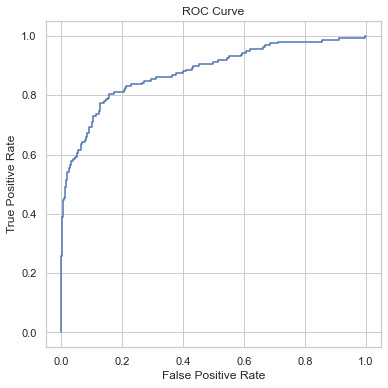

In [92]:
fpr, tpr, _ = metrics.roc_curve(y_test_p,  cb_forwards_p_class1_probs)

plt.figure(figsize=(6,6))
sns.set_theme(style= "whitegrid")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.show()

In [93]:
print('CatBoost Classifier AUC score: %.3f' % average_precision_score(y_test_p, cb_forwards_p_class1_probs)) 

CatBoost Classifier AUC score: 0.780


In [94]:
def custom_predict(X, threshold):
    
    return (cb_forwards_p_class1_probs > threshold).astype(int)
    
    
cb_forwards_p_thresh_predicts = custom_predict(X = x_test_p, threshold = cb_forwards_p_best_threshold) 

In [95]:
cb_forwards_p_thresh_cm= confusion_matrix(y_test_p, cb_forwards_p_thresh_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_thresh_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[514  76]
 [ 36 123]]


In [96]:
print(classification_report(y_test_p, cb_forwards_p_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.93      0.87      0.90       590
  High Level       0.62      0.77      0.69       159

    accuracy                           0.85       749
   macro avg       0.78      0.82      0.79       749
weighted avg       0.87      0.85      0.86       749



In [97]:
print("CatBoost Classifier Brier Score:",brier_score_loss(y_test_p, cb_forwards_p_class1_probs))

CatBoost Classifier Brier Score: 0.09094671273404598


* Model Tuning

In [98]:
'''
cb_forwards_p_prmt = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }
'''

"\ncb_forwards_p_prmt = {\n    'iterations': [200,500],\n    'learning_rate': [0.01,0.05, 0.1],\n    'depth': [3,5,8] }\n"

In [99]:
'''
cb_forwards_p_cv_model = GridSearchCV(cb_forwards_p, 
                           cb_forwards_p_prmt, 
                           cv = 10, 
                            n_jobs = -1)
'''

'\ncb_forwards_p_cv_model = GridSearchCV(cb_forwards_p, \n                           cb_forwards_p_prmt, \n                           cv = 10, \n                            n_jobs = -1)\n'

In [100]:
#cb_forwards_p_cv_model.fit(x_train_p, y_train_p)

In [101]:
#print("Best parameters:", cb_forwards_p_cv_model.best_params_)
#Best parameters: {'depth': 5, 'iterations': 500, 'learning_rate': 0.05}

In [102]:
cb_forwards_p_tuned= CatBoostClassifier(iterations=500, 
                       learning_rate=0.05,
                       depth=5, verbose=False)

cb_forwards_p_tuned.fit(x_train_p, y_train_p)

In [103]:
cb_forwards_p_tuned_predicts= cb_forwards_p_tuned.predict(x_test_p)

cb_forwards_p_tuned_cm = confusion_matrix(y_test_p, cb_forwards_p_tuned_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_tuned_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[568  22]
 [ 64  95]]


In [104]:
print(classification_report(y_test_p, cb_forwards_p_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.90      0.96      0.93       590
  High Level       0.81      0.60      0.69       159

    accuracy                           0.89       749
   macro avg       0.86      0.78      0.81       749
weighted avg       0.88      0.89      0.88       749



* Final Model

In [105]:
cb_forwards_p_class1_probs_tuned= cb_forwards_p_tuned.predict_proba(x_test_p)[:, 1]

f1_list = []
for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_tuned_thres_predicts = cb_forwards_p_class1_probs_tuned > threshold
    precision = precision_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    recall = recall_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    f1 = f1_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.212, Completeness = 1.000 | F1 = 0.350
Threshold = 0.01 | Accuracy = 0.248, Completeness = 0.975 | F1 = 0.395
Threshold = 0.02 | Accuracy = 0.293, Completeness = 0.956 | F1 = 0.448
Threshold = 0.03 | Accuracy = 0.324, Completeness = 0.918 | F1 = 0.479
Threshold = 0.04 | Accuracy = 0.348, Completeness = 0.881 | F1 = 0.499
Threshold = 0.05 | Accuracy = 0.367, Completeness = 0.862 | F1 = 0.515
Threshold = 0.06 | Accuracy = 0.395, Completeness = 0.855 | F1 = 0.541
Threshold = 0.07 | Accuracy = 0.416, Completeness = 0.843 | F1 = 0.557
Threshold = 0.08 | Accuracy = 0.460, Completeness = 0.836 | F1 = 0.594
Threshold = 0.09 | Accuracy = 0.494, Completeness = 0.836 | F1 = 0.621
Threshold = 0.10 | Accuracy = 0.520, Completeness = 0.830 | F1 = 0.639
Threshold = 0.11 | Accuracy = 0.541, Completeness = 0.824 | F1 = 0.653
Threshold = 0.12 | Accuracy = 0.555, Completeness = 0.824 | F1 = 0.663
Threshold = 0.13 | Accuracy = 0.570, Completeness = 0.818 | F1 = 0.672
Thresh

In [106]:
f1_list = np.asarray(f1_list)
f1_list.max()

for threshold in np.arange(0, 0.95, 0.01):
    cb_forwards_p_tuned_thres_predicts = cb_forwards_p_class1_probs_tuned > threshold
    f1 = f1_score(y_test_p, cb_forwards_p_tuned_thres_predicts)
    if f1_list.max() == f1:
        cb_forwards_p_tuned_best_threshold = threshold


print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", cb_forwards_p_tuned_best_threshold)

Maximum f1 score is: 0.698 and best threshold is: 0.48


* Precision-Recall Curve

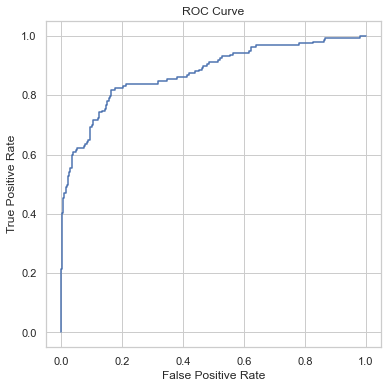

In [107]:
fpr, tpr, _ = metrics.roc_curve(y_test_p,  cb_forwards_p_class1_probs_tuned)

plt.figure(figsize=(6,6))
sns.set_theme(style= "whitegrid")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.show()

In [108]:
print('Tuned CatBoost Classifier P Quality AUC Score: %.3f' % average_precision_score(y_test_p, cb_forwards_p_class1_probs_tuned)) 

Tuned CatBoost Classifier P Quality AUC Score: 0.773


In [109]:
def custom_predict(X, threshold):

    return (cb_forwards_p_class1_probs_tuned > threshold).astype(int)
    
    
cb_forwards_p_tuned_thres_predicts = custom_predict(X=x_test_p, threshold = cb_forwards_p_tuned_best_threshold) 

In [110]:
cb_forwards_p_tuned_cm = confusion_matrix(y_test_p, cb_forwards_p_tuned_thres_predicts)
print("\nTuned CatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_forwards_p_tuned_cm)


Tuned CatBoost Classifier P Quality Confusion Matrix:

[[568  22]
 [ 62  97]]


In [111]:
print(classification_report(y_test_p, cb_forwards_p_tuned_thres_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.90      0.96      0.93       590
  High Level       0.82      0.61      0.70       159

    accuracy                           0.89       749
   macro avg       0.86      0.79      0.81       749
weighted avg       0.88      0.89      0.88       749



In [112]:
print("CatBoost Classifier Brier Score:",brier_score_loss(y_test_p, cb_forwards_p_class1_probs_tuned))

CatBoost Classifier Brier Score: 0.09294998679788138


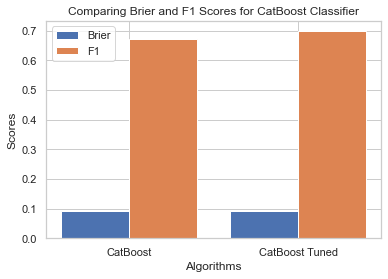

In [113]:
brier_scores = [brier_score_loss(y_test_p, cb_forwards_p_class1_probs), brier_score_loss(y_test_p, cb_forwards_p_class1_probs_tuned)]
f1_scores =[f1_score(y_test_p, cb_forwards_p_predicts), f1_score(y_test_p, cb_forwards_p_tuned_thres_predicts)]
X = ['CatBoost','CatBoost Tuned']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, brier_scores, 0.4, label = 'Brier')
plt.bar(X_axis + 0.2, f1_scores, 0.4, label = 'F1')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparing Brier and F1 Scores for CatBoost Classifier")
plt.legend()
plt.show()

### Regression

In [114]:
forwards_model_reg_P = forwards_model[forwards_model["PA"]>=150]

In [115]:
forwards_model.corr()["PA"].sort_values()

Pos                    -0.073616
Age                    -0.044719
Preferred Foot_Right   -0.020174
Agg                     0.026894
Jum                     0.029940
Height                  0.031583
Weight                  0.037786
Hea                     0.037811
Bra                     0.064807
Wor                     0.065658
Str                     0.068828
Cor                     0.075641
Preferred Foot_Left     0.081011
Ldr                     0.101251
Sta                     0.105401
Tea                     0.108759
Nat                     0.129277
Cro                     0.153006
Fre                     0.155017
Cnt                     0.159726
Acc                     0.181887
Det                     0.182510
Pac                     0.190333
Lon                     0.196442
Pen                     0.208176
Bal                     0.218638
Agi                     0.218709
Dec                     0.275787
Fla                     0.285507
Vis                     0.287400
Ant       

In [116]:
x_forwards_reg = forwards_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality", "Preferred Foot_Right", "Agg",
                                                   "Jum"])
y_forwards_P = forwards_model_reg_P["PA"]
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_forwards_reg, y_forwards_P, test_size=0.33, random_state=674)

In [117]:
gbr_forwards_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)

In [118]:
gbr_forwards_P_predicts = gbr_forwards_P.predict(x_test_P)

In [119]:
metrics.mean_absolute_error(y_test_P, gbr_forwards_P_predicts)

4.5170701023172

In [120]:
'''
for i in range (2000,3000):
    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_forwards_reg, y_forwards_P, test_size=0.33, random_state=i)
    gbc_forwards_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)
    gbc_forwards_P_predicts = gbc_forwards_P.predict(x_test_P)
    
    if metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts)<4.75:
        print(metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts), i)
'''

'\nfor i in range (2000,3000):\n    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_forwards_reg, y_forwards_P, test_size=0.33, random_state=i)\n    gbc_forwards_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)\n    gbc_forwards_P_predicts = gbc_forwards_P.predict(x_test_P)\n    \n    if metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts)<4.75:\n        print(metrics.mean_absolute_error(y_test_P, gbc_forwards_P_predicts), i)\n'

In [121]:
differences_forwards = y_test_P- gbr_forwards_P_predicts

<AxesSubplot:xlabel='PA', ylabel='Density'>

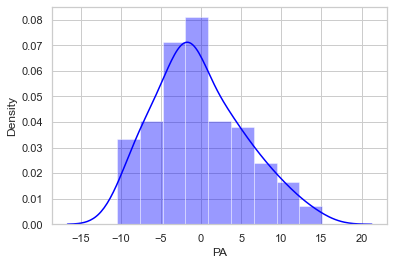

In [122]:
sns.distplot(differences_forwards, color = 'Blue')

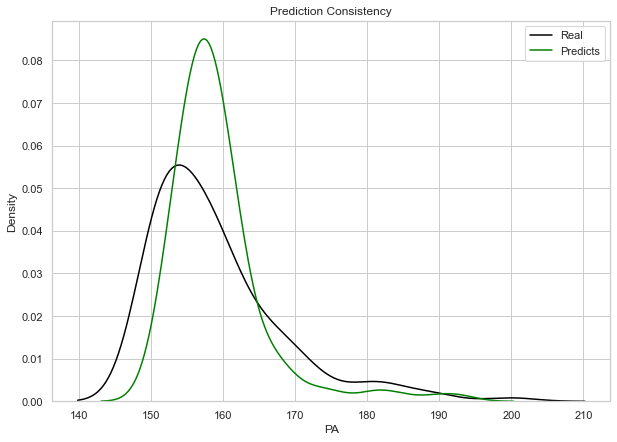

In [123]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(gbr_forwards_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA', ylabel='PA'>

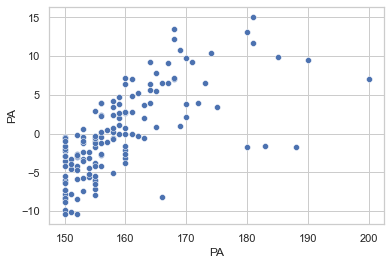

In [124]:
sns.scatterplot(forwards_model_reg_P.PA, differences_forwards)

In [125]:
df_forwards_errors = forwards.iloc[0:448,:]

In [126]:
df_forwards_errors = df_forwards_errors.loc[x_test_P.index]

In [127]:
df_forwards_errors["Errors"] = differences_forwards

In [128]:
df_forwards_errors["Predictions"] = gbr_forwards_P_predicts

In [129]:
df_forwards_errors

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Errors,Predictions
265,Giacomo Bonaventura,Milan,Italian Serie A,180,75,29,Right,M (L),147,155,...,13,11,15,13,13,14,1,1,-5.517052,160.517052
445,Wesley,Aston Villa,English Premier Division,190,93,22,Right,ST (C),129,150,...,13,15,14,12,16,12,1,1,-6.383455,156.383455
411,Ivan Petryak,FehÃ©rvÃ¡r FC,Hungarian Division I,171,63,25,Right,M (L),128,150,...,14,11,13,13,15,15,1,1,-0.615914,150.615914
256,Borja Iglesias,Real Betis,Spanish First Division,187,84,26,Right,ST (C),146,155,...,13,13,15,13,12,13,1,1,-1.794879,156.794879
221,Danylo Sikan,Shakhtar,Ukrainian Premier League,185,71,18,Right,ST (C),110,157,...,14,13,11,15,4,14,1,0,0.471651,156.528349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Andreas Skov Olsen,Bologna,Italian Serie A,187,78,19,Either,AM (R),128,158,...,8,11,15,13,6,13,1,1,-0.560018,158.560018
96,Maxi RodrÃ­guez,Newell's,Argentine Premier Division,180,74,38,Right,M (L),126,165,...,12,13,15,10,14,10,1,1,7.782730,157.217270
160,Cengiz Ãnder,Leicester,English Premier Division,173,66,21,Left,AM (R),144,160,...,8,12,14,16,7,17,1,1,-0.013729,160.013729
110,Pedro,Roma,Italian Serie A,169,66,31,Either,AM (R),151,164,...,10,14,16,17,14,15,1,1,6.404191,157.595809


## Midfielders

<AxesSubplot:title={'center':'Midfielders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

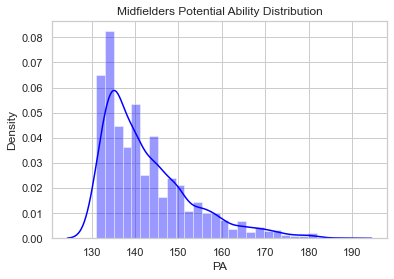

In [130]:
plt.title("Midfielders Potential Ability Distribution")
sns.distplot(midfielders_model.PA, color = 'Blue')

In [131]:
for i in range(len(midfielders_model)):
    if midfielders_model["CA"][i]>=125:
        midfielders_model["C_Quality"][i]=1
    else:
        midfielders_model["C_Quality"][i]=0



for i in range(len(midfielders_model)):
    if midfielders_model["PA"][i]>=150:
        midfielders_model["P_Quality"][i]=1
    else:
        midfielders_model["P_Quality"][i]=0

In [132]:
midfielders_model[midfielders_model["PA"]>=150]

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,181,70,27,188,188,15,20,17,14,9,...,14,14,13,13,12,15,1,1,1,1
1,171,68,35,154,183,13,20,20,17,7,...,10,11,18,9,8,10,1,1,1,1
2,181,69,22,164,183,15,18,16,17,12,...,13,13,17,16,7,14,1,1,0,1
3,179,76,32,136,180,10,17,18,12,9,...,12,13,16,11,11,8,1,1,0,1
4,185,80,20,138,180,15,12,12,14,16,...,14,13,14,13,12,12,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,184,78,34,129,150,18,9,12,14,16,...,16,17,14,13,18,13,1,1,0,1
418,190,80,31,142,150,17,13,12,18,15,...,15,14,14,10,13,10,1,1,0,1
419,182,80,28,131,150,13,10,13,15,14,...,15,15,16,13,14,12,1,1,0,1
420,179,70,27,135,150,14,16,16,13,8,...,7,11,13,16,15,14,1,1,0,1


In [133]:
midfielders_model.corr()["P_Quality"].sort_values()

Age                    -0.034396
Mar                    -0.020675
Preferred Foot_Right    0.005039
Preferred Foot_Left     0.015722
Weight                  0.035030
Hea                     0.035041
Height                  0.045681
Pos                     0.046382
Jum                     0.052453
Ldr                     0.058966
Agg                     0.060641
Tck                     0.066414
Fre                     0.084930
Acc                     0.088337
Bra                     0.092833
Pac                     0.095812
Cor                     0.099246
Str                     0.101421
Wor                     0.101954
Lon                     0.107613
Sta                     0.134284
Pen                     0.143026
Det                     0.144655
Cnt                     0.146551
Agi                     0.148590
Nat                     0.156968
Cro                     0.160131
Fin                     0.172692
Tea                     0.176078
Fla                     0.194222
Bal       

In [134]:
x_midfielders = midfielders_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality", "Preferred Foot_Right"])
y_midfielders_p = midfielders_model["P_Quality"]

In [135]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_midfielders, y_midfielders_p, test_size=0.33, random_state=16)

### Classifying

In [136]:
cb_midfielders_p = CatBoostClassifier(verbose=False).fit(x_train_p, y_train_p)

In [137]:
cb_midfielders_p_predicts = cb_midfielders_p.predict(x_test_p)

In [138]:
cb_midfielders_p_cm = confusion_matrix(y_test_p, cb_midfielders_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_midfielders_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[509  18]
 [ 50  86]]


In [139]:
print(classification_report(y_test_p, cb_midfielders_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.91      0.97      0.94       527
  High Level       0.83      0.63      0.72       136

    accuracy                           0.90       663
   macro avg       0.87      0.80      0.83       663
weighted avg       0.89      0.90      0.89       663



In [140]:
'''
max_f1=0
best_i=0
for i in range(0,1000):
    
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_midfielders, y_midfielders_p, test_size=0.33, random_state=i)
    cb_midfielders_p = CatBoostClassifier(verbose=False)
    cb_midfielders_p.fit(x_train_p, y_train_p)
    cb_midfielders_p_predicts = cb_midfielders_p.predict(x_test_p)
    
    cb_midfielders_p_cm = confusion_matrix(y_test_p, cb_midfielders_p_predicts)
    p=(cb_midfielders_p_cm[1][1]/(cb_midfielders_p_cm[0][1]+cb_midfielders_p_cm[1][1]))
    r=(cb_midfielders_p_cm[1][1]/(cb_midfielders_p_cm[1][0]+cb_midfielders_p_cm[1][1]))
    f1=(2*p*r)/(p+r)
    if f1>max_f1:
        max_f1=f1
        best_i=i
        if max_f1>0.64:
            print(max_f1, "which random state:", best_i)
print("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)
'''

'\nmax_f1=0\nbest_i=0\nfor i in range(0,1000):\n    \n    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_midfielders, y_midfielders_p, test_size=0.33, random_state=i)\n    cb_midfielders_p = CatBoostClassifier(verbose=False)\n    cb_midfielders_p.fit(x_train_p, y_train_p)\n    cb_midfielders_p_predicts = cb_midfielders_p.predict(x_test_p)\n    \n    cb_midfielders_p_cm = confusion_matrix(y_test_p, cb_midfielders_p_predicts)\n    p=(cb_midfielders_p_cm[1][1]/(cb_midfielders_p_cm[0][1]+cb_midfielders_p_cm[1][1]))\n    r=(cb_midfielders_p_cm[1][1]/(cb_midfielders_p_cm[1][0]+cb_midfielders_p_cm[1][1]))\n    f1=(2*p*r)/(p+r)\n    if f1>max_f1:\n        max_f1=f1\n        best_i=i\n        if max_f1>0.64:\n            print(max_f1, "which random state:", best_i)\nprint("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)\n'

In [141]:
cb_midfielders_p_class1_probs = cb_midfielders_p.predict_proba(x_test_p)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    cb_midfielders_p_thresh_predicts = cb_midfielders_p_class1_probs > threshold
    precision = precision_score(y_test_p, cb_midfielders_p_thresh_predicts)
    recall = recall_score(y_test_p, cb_midfielders_p_thresh_predicts)
    f1 = f1_score(y_test_p, cb_midfielders_p_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.205, Completeness = 1.000 | F1 = 0.340
Threshold = 0.01 | Accuracy = 0.213, Completeness = 0.985 | F1 = 0.351
Threshold = 0.02 | Accuracy = 0.233, Completeness = 0.985 | F1 = 0.376
Threshold = 0.03 | Accuracy = 0.249, Completeness = 0.978 | F1 = 0.397
Threshold = 0.04 | Accuracy = 0.278, Completeness = 0.978 | F1 = 0.433
Threshold = 0.05 | Accuracy = 0.292, Completeness = 0.963 | F1 = 0.449
Threshold = 0.06 | Accuracy = 0.310, Completeness = 0.949 | F1 = 0.467
Threshold = 0.07 | Accuracy = 0.334, Completeness = 0.949 | F1 = 0.494
Threshold = 0.08 | Accuracy = 0.352, Completeness = 0.934 | F1 = 0.511
Threshold = 0.09 | Accuracy = 0.366, Completeness = 0.926 | F1 = 0.525
Threshold = 0.10 | Accuracy = 0.380, Completeness = 0.919 | F1 = 0.538
Threshold = 0.11 | Accuracy = 0.397, Completeness = 0.904 | F1 = 0.552
Threshold = 0.12 | Accuracy = 0.423, Completeness = 0.904 | F1 = 0.576
Threshold = 0.13 | Accuracy = 0.447, Completeness = 0.904 | F1 = 0.599
Thresh

In [142]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    cb_midfielders_p_thresh_predicts = cb_midfielders_p_class1_probs > threshold
    f1 = f1_score(y_test_p, cb_midfielders_p_thresh_predicts)
    if f1_list.max() == f1:
        cb_midfielders_p_best_threshold = threshold

print("Maximum f1 score for p quality is: %.3f" % f1_list.max(),"and best threshold is:", cb_midfielders_p_best_threshold)

Maximum f1 score for p quality is: 0.736 and best threshold is: 0.36


In [143]:
def custom_predict(X, threshold):
    
    return (cb_midfielders_p_class1_probs > threshold).astype(int)
    
    
cb_midfielders_p_thresh_predicts = custom_predict(X = x_test_p, threshold = cb_midfielders_p_best_threshold) 

In [144]:
cb_midfielders_p_thresh_cm= confusion_matrix(y_test_p, cb_midfielders_p_thresh_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_midfielders_p_thresh_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[498  29]
 [ 40  96]]


In [145]:
print(classification_report(y_test_p, cb_midfielders_p_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.93      0.94      0.94       527
  High Level       0.77      0.71      0.74       136

    accuracy                           0.90       663
   macro avg       0.85      0.83      0.84       663
weighted avg       0.89      0.90      0.89       663



### Regression

In [146]:
midfielders_model_reg_P = midfielders_model[midfielders_model["PA"]>=150]

In [147]:
x_midfielders_reg = midfielders_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_midfielders_P = midfielders_model_reg_P["PA"]
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_midfielders_reg, y_midfielders_P, test_size=0.33, random_state=375)

In [148]:
cb_midfielders_P = CatBoostRegressor(verbose=False).fit(x_train_P, y_train_P)

In [149]:
cb_midfielders_P_predicts = cb_midfielders_P.predict(x_test_P)

In [150]:
metrics.mean_absolute_error(y_test_P, cb_midfielders_P_predicts)

4.4403643112153866

In [151]:
'''
for i in range (0, 1000):
    x_train_verbose=x_test_P, y_train_P, y_test_P = train_test_split(x_midfielders_reg, y_midfielders_P, test_size=0.33, random_state=i)
    gbc_midfielders_P = CatBoostRegressor(verbose=False).fit(x_train_P, y_train_P)
    gbc_midfielders_P_predicts = gbc_midfielders_P.predict(x_test_P)
    
    if metrics.mean_absolute_error(y_test_P, gbc_midfielders_P_predicts)<4.65:
        print(metrics.mean_absolute_error(y_test_P, gbc_midfielders_P_predicts), i)
'''

'\nfor i in range (0, 1000):\n    x_train_verbose=x_test_P, y_train_P, y_test_P = train_test_split(x_midfielders_reg, y_midfielders_P, test_size=0.33, random_state=i)\n    gbc_midfielders_P = CatBoostRegressor(verbose=False).fit(x_train_P, y_train_P)\n    gbc_midfielders_P_predicts = gbc_midfielders_P.predict(x_test_P)\n    \n    if metrics.mean_absolute_error(y_test_P, gbc_midfielders_P_predicts)<4.65:\n        print(metrics.mean_absolute_error(y_test_P, gbc_midfielders_P_predicts), i)\n'

In [152]:
differences_midfielders = y_test_P- cb_midfielders_P_predicts

<AxesSubplot:xlabel='PA', ylabel='Density'>

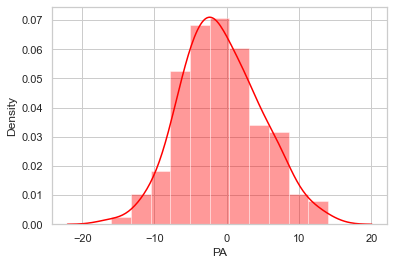

In [153]:
sns.distplot(differences_midfielders, color = 'Red')

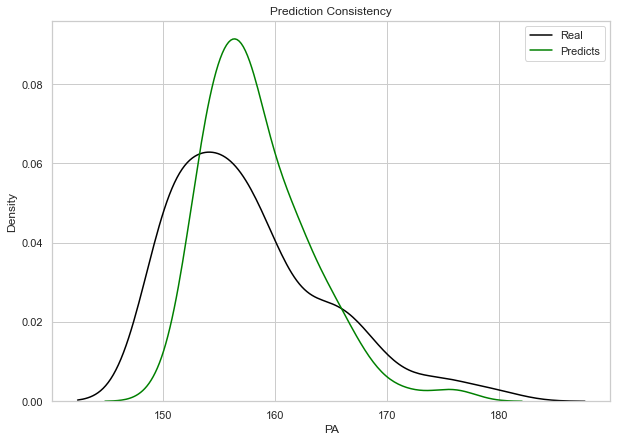

In [154]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(cb_midfielders_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA', ylabel='PA'>

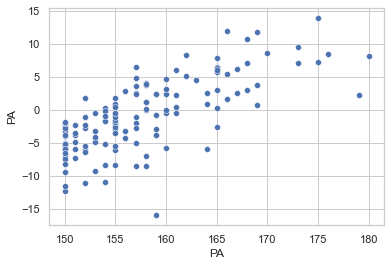

In [155]:
sns.scatterplot(midfielders_model_reg_P.PA, differences_midfielders)

In [156]:
midfielders_model_reg_P

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,181,70,27,188,188,15,20,17,14,9,...,14,14,13,13,12,15,1,1,1,1
1,171,68,35,154,183,13,20,20,17,7,...,10,11,18,9,8,10,1,1,1,1
2,181,69,22,164,183,15,18,16,17,12,...,13,13,17,16,7,14,1,1,0,1
3,179,76,32,136,180,10,17,18,12,9,...,12,13,16,11,11,8,1,1,0,1
4,185,80,20,138,180,15,12,12,14,16,...,14,13,14,13,12,12,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,184,78,34,129,150,18,9,12,14,16,...,16,17,14,13,18,13,1,1,0,1
418,190,80,31,142,150,17,13,12,18,15,...,15,14,14,10,13,10,1,1,0,1
419,182,80,28,131,150,13,10,13,15,14,...,15,15,16,13,14,12,1,1,0,1
420,179,70,27,135,150,14,16,16,13,8,...,7,11,13,16,15,14,1,1,0,1


In [157]:
df_midfielders_errors = midfielders.iloc[0:422,:]

In [158]:
df_midfielders_errors = df_midfielders_errors.loc[x_test_P.index]

In [159]:
df_midfielders_errors["Errors"] = differences_midfielders

In [160]:
df_midfielders_errors["Predictions"] = cb_midfielders_P_predicts

In [161]:
df_midfielders_errors

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Errors,Predictions
246,Gareth Barry,Unknown,Unknown,183,78,38,Left,DM,117,155,...,13,12,16,7,14,5,1,0,1.778949,153.221051
412,Steven Alzate,Brighton,English Premier Division,177,65,20,Right,AM (C),125,150,...,11,14,10,15,6,14,1,1,-5.163982,155.163982
204,Miguel Veloso,Verona,Italian Serie A,180,79,33,Left,DM,129,157,...,10,15,13,12,13,11,1,1,4.933411,152.066589
183,Marcos Llorente,A. Madrid,Spanish First Division,184,73,24,Right,DM,147,158,...,13,12,14,11,13,14,1,1,1.206351,156.793649
67,MickaÃ«l Cuisance,OM,Ligue 1 Conforama,181,74,19,Left,M (C),128,168,...,13,12,11,14,12,12,1,1,10.725072,157.274928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Nikola Moro,Dinamo,Croatian First League,183,77,21,Either,M (C),132,158,...,13,10,12,11,13,12,1,1,3.746432,154.253568
281,Ludovic Blas,FC Nantes,Ligue 1 Conforama,180,73,21,Left,M (C),126,154,...,11,13,13,15,9,13,1,1,-0.195582,154.195582
251,Jean Pyerre,GrÃªmio,Brazilian National First Division,187,72,21,Right Only,AM (C),132,155,...,10,13,12,13,12,14,1,1,-2.547955,157.547955
317,Gary Medel,Bologna,Italian Serie A,171,76,31,Right,DM,135,152,...,19,16,16,14,18,15,1,1,-6.033749,158.033749


## Defenders

<AxesSubplot:title={'center':'Defenders Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

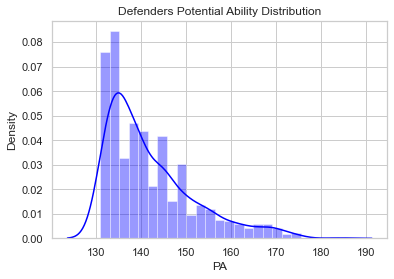

In [162]:
plt.title("Defenders Potential Ability Distribution")
sns.distplot(defenders_model.PA, color = 'Blue')

In [163]:
defenders_model[defenders_model["PA"]>=150]

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,193,92,27,180,184,12,14,14,14,17,...,15,15,16,12,17,16,1,1,0,1
1,192,90,30,156,175,8,14,13,12,16,...,13,15,17,10,9,11,1,1,1,1
2,182,70,16,101,175,12,11,14,10,12,...,10,11,11,13,10,10,1,0,1,0
3,187,85,34,168,174,16,8,8,18,19,...,20,16,17,10,16,10,1,1,1,0
4,184,83,33,172,174,16,13,14,14,18,...,17,15,17,15,18,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,188,92,22,130,150,14,8,11,13,15,...,16,15,13,10,12,11,1,1,1,0
204,186,86,19,129,150,12,10,11,14,16,...,15,15,13,13,8,13,1,1,0,1
205,186,79,28,133,150,15,11,10,14,16,...,17,16,11,11,18,13,1,1,1,0
206,191,89,31,121,150,18,10,9,17,15,...,15,13,12,11,13,5,1,0,0,1


In [164]:
for i in range(len(defenders_model)):
    if defenders_model["CA"][i]>=125:
        defenders_model["C_Quality"][i]=1
    else:
        defenders_model["C_Quality"][i]=0



for i in range(len(defenders_model)):
    if defenders_model["PA"][i]>=150:
        defenders_model["P_Quality"][i]=1
    else:
        defenders_model["P_Quality"][i]=0

In [165]:
defenders_model.corr()["P_Quality"].sort_values()

Cor                    -0.132107
Age                    -0.096246
Preferred Foot_Right   -0.002880
Preferred Foot_Left     0.007617
Lon                     0.015780
Fre                     0.024525
OtB                     0.025471
Cro                     0.031506
Pen                     0.041459
Ldr                     0.067481
Agg                     0.073850
Height                  0.093199
Weight                  0.101713
Nat                     0.103478
Wor                     0.118921
Fin                     0.120981
Acc                     0.137350
Fla                     0.144632
Agi                     0.158931
Jum                     0.159368
Cnt                     0.161117
Bra                     0.164112
Str                     0.170551
Sta                     0.171975
Hea                     0.173730
Bal                     0.177246
Det                     0.198136
Tea                     0.198813
Dri                     0.229163
Pac                     0.229329
Dec       

In [166]:
x_defenders = defenders_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_defenders_p = defenders_model["P_Quality"]

In [167]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_defenders, y_defenders_p, test_size=0.33, random_state=16)

### Classifying

In [168]:
cb_defenders_p = CatBoostClassifier(verbose=False).fit(x_train_p, y_train_p)

In [169]:
cb_defenders_p_predicts = cb_defenders_p.predict(x_test_p)

In [170]:
cb_defenders_p_cm = confusion_matrix(y_test_p, cb_defenders_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_defenders_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[283   6]
 [ 22  38]]


In [171]:
print(classification_report(y_test_p, cb_defenders_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.93      0.98      0.95       289
  High Level       0.86      0.63      0.73        60

    accuracy                           0.92       349
   macro avg       0.90      0.81      0.84       349
weighted avg       0.92      0.92      0.91       349



In [172]:
'''
max_f1=0
best_i=0
for i in range(0,1000):
    
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_defenders, y_defenders_p, test_size=0.33, random_state=i)
    cb_defenders_p = CatBoostClassifier(verbose=False)
    cb_defenders_p.fit(x_train_p, y_train_p)
    cb_defenders_p_predicts = cb_defenders_p.predict(x_test_p)
    
    cb_defenders_p_cm = confusion_matrix(y_test_p, cb_defenders_p_predicts)
    p=(cb_defenders_p_cm[1][1]/(cb_defenders_p_cm[0][1]+cb_defenders_p_cm[1][1]))
    r=(cb_defenders_p_cm[1][1]/(cb_defenders_p_cm[1][0]+cb_defenders_p_cm[1][1]))
    f1=(2*p*r)/(p+r)
    if f1>max_f1:
        max_f1=f1
        best_i=i
        if max_f1>0.73:
            print(max_f1, "which random state:", best_i)
print("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)
'''

'\nmax_f1=0\nbest_i=0\nfor i in range(0,1000):\n    \n    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_defenders, y_defenders_p, test_size=0.33, random_state=i)\n    cb_defenders_p = CatBoostClassifier(verbose=False)\n    cb_defenders_p.fit(x_train_p, y_train_p)\n    cb_defenders_p_predicts = cb_defenders_p.predict(x_test_p)\n    \n    cb_defenders_p_cm = confusion_matrix(y_test_p, cb_defenders_p_predicts)\n    p=(cb_defenders_p_cm[1][1]/(cb_defenders_p_cm[0][1]+cb_defenders_p_cm[1][1]))\n    r=(cb_defenders_p_cm[1][1]/(cb_defenders_p_cm[1][0]+cb_defenders_p_cm[1][1]))\n    f1=(2*p*r)/(p+r)\n    if f1>max_f1:\n        max_f1=f1\n        best_i=i\n        if max_f1>0.73:\n            print(max_f1, "which random state:", best_i)\nprint("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)\n'

### Regression

In [173]:
defenders_model_reg_P = defenders_model[defenders_model["PA"]>=150]

In [174]:
x_defenders_reg = defenders_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_defenders_P = defenders_model_reg_P["PA"]
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_defenders_reg, y_defenders_P, test_size=0.33, random_state=519)

In [175]:
lgbm_defenders_P = LGBMRegressor().fit(x_train_P, y_train_P)

In [176]:
lgbm_defenders_P_predicts = lgbm_defenders_P.predict(x_test_P)

In [177]:
metrics.mean_absolute_error(y_test_P, lgbm_defenders_P_predicts)

3.4727859480964334

In [178]:
'''
for i in range (0, 1000):
    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_defenders_reg, y_defenders_P, test_size=0.33, random_state=i)
    lgbm_defenders_P = LGBMRegressor().fit(x_train_P, y_train_P)
    lgbm_defenders_P_predicts = lgbm_defenders_P.predict(x_test_P)
    
    if metrics.mean_absolute_error(y_test_P, lgbm_defenders_P_predicts)<4.02:
        print(metrics.mean_absolute_error(y_test_P, lgbm_defenders_P_predicts), i)
'''

'\nfor i in range (0, 1000):\n    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_defenders_reg, y_defenders_P, test_size=0.33, random_state=i)\n    lgbm_defenders_P = LGBMRegressor().fit(x_train_P, y_train_P)\n    lgbm_defenders_P_predicts = lgbm_defenders_P.predict(x_test_P)\n    \n    if metrics.mean_absolute_error(y_test_P, lgbm_defenders_P_predicts)<4.02:\n        print(metrics.mean_absolute_error(y_test_P, lgbm_defenders_P_predicts), i)\n'

In [179]:
differences_defenders = y_test_P- lgbm_defenders_P_predicts

<AxesSubplot:xlabel='PA', ylabel='Density'>

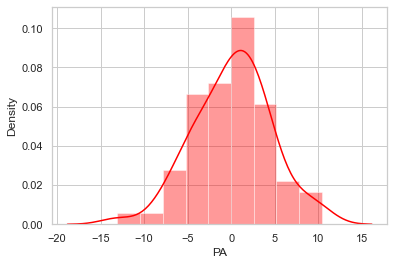

In [180]:
sns.distplot(differences_defenders, color = 'Red')

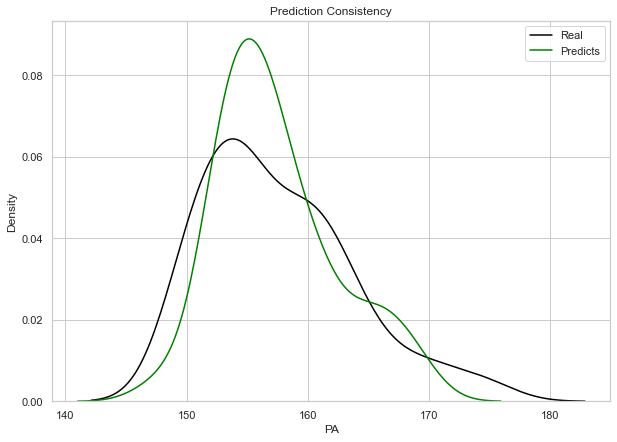

In [181]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(lgbm_defenders_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA', ylabel='PA'>

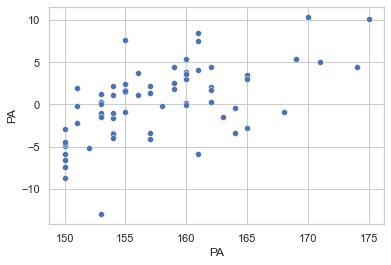

In [182]:
sns.scatterplot(defenders_model_reg_P.PA, differences_defenders)

In [183]:
defenders_model_reg_P

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,193,92,27,180,184,12,14,14,14,17,...,15,15,16,12,17,16,1,1,0,1
1,192,90,30,156,175,8,14,13,12,16,...,13,15,17,10,9,11,1,1,1,1
2,182,70,16,101,175,12,11,14,10,12,...,10,11,11,13,10,10,1,0,1,0
3,187,85,34,168,174,16,8,8,18,19,...,20,16,17,10,16,10,1,1,1,0
4,184,83,33,172,174,16,13,14,14,18,...,17,15,17,15,18,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,188,92,22,130,150,14,8,11,13,15,...,16,15,13,10,12,11,1,1,1,0
204,186,86,19,129,150,12,10,11,14,16,...,15,15,13,13,8,13,1,1,0,1
205,186,79,28,133,150,15,11,10,14,16,...,17,16,11,11,18,13,1,1,1,0
206,191,89,31,121,150,18,10,9,17,15,...,15,13,12,11,13,5,1,0,0,1


In [184]:
df_defenders_errors = defenders.iloc[0:208,:]

In [185]:
df_defenders_errors = df_defenders_errors.loc[x_test_P.index]

In [186]:
df_defenders_errors["Errors"] = differences_defenders

In [187]:
df_defenders_errors["Predictions"] = lgbm_defenders_P_predicts

In [188]:
df_defenders_errors

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Errors,Predictions
198,Marlon Torres,AmÃ©rica de Cali,Colombian First Division,180,70,23,Right,D (C),126,150,...,12,12,13,13,11,13,1,1,-2.898724,152.898724
128,Jhon LucumÃ­,KRC Genk,Belgian Pro League A,187,79,20,Left,D (C),122,154,...,14,14,12,9,15,14,1,0,-1.621595,155.621595
39,Eric GarcÃ­a,Man City,English Premier Division,182,79,18,Right,D (C),135,165,...,13,13,14,14,12,13,1,1,3.464780,161.535220
146,Domingos Duarte,Granada,Spanish First Division,190,84,24,Right,D (C),138,153,...,14,14,13,12,13,12,1,1,0.258078,152.741922
60,Kurt Zouma,Chelsea,English Premier Division,190,96,24,Right Only,D (C),156,162,...,14,19,13,11,15,18,1,1,0.276106,161.723894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Shkodran Mustafi,Schalke 04,Bundesliga,184,82,27,Right,D (C),137,161,...,17,14,13,13,14,15,1,1,4.092513,156.907487
50,Kostas Manolas,Napoli,Italian Serie A,186,85,28,Right,D (C),155,163,...,16,17,15,12,17,14,1,1,-1.504417,164.504417
63,Naldo,Unknown,Brazilian National Second Division,198,88,36,Right,D (C),125,161,...,13,12,14,8,12,7,1,1,8.445861,152.554139
90,David Luiz,Arsenal,English Premier Division,189,86,32,Right,D (C),145,157,...,17,15,16,12,17,15,1,1,-4.069178,161.069178


## Backs

<AxesSubplot:title={'center':'Backs Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

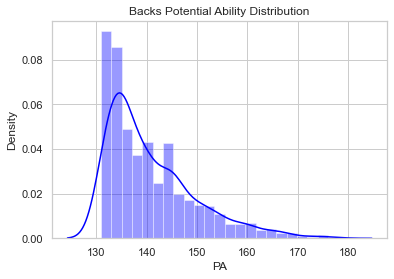

In [189]:
plt.title("Backs Potential Ability Distribution")
sns.distplot(backs_model.PA, color = 'Blue')

In [190]:
backs_model[backs_model["PA"]>=150]

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,180,70,20,159,178,15,16,17,15,13,...,14,14,15,14,15,14,1,1,0,1
1,186,82,37,102,175,8,1,1,6,1,...,7,7,6,14,8,12,1,0,0,1
2,170,68,36,155,174,16,15,16,15,14,...,17,12,15,12,17,14,1,1,0,1
3,178,72,27,168,174,17,13,15,18,12,...,13,14,16,14,13,16,1,1,1,0
4,176,70,24,171,173,17,16,15,18,14,...,14,13,17,15,12,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,187,80,28,145,150,13,11,15,13,13,...,15,12,16,13,12,15,1,1,0,1
138,181,67,23,130,150,14,14,12,15,12,...,17,13,12,12,9,14,1,1,1,0
139,176,67,28,138,150,16,9,13,16,16,...,14,15,12,15,12,15,1,1,0,1
140,171,64,21,120,150,15,13,13,13,13,...,12,12,12,14,12,15,1,0,1,0


In [191]:
for i in range(len(backs_model)):
    if backs_model["CA"][i]>=125:
        backs_model["C_Quality"][i]=1
    else:
        backs_model["C_Quality"][i]=0



for i in range(len(backs_model)):
    if backs_model["PA"][i]>=150:
        backs_model["P_Quality"][i]=1
    else:
        backs_model["P_Quality"][i]=0

In [192]:
backs_model.corr()["P_Quality"].sort_values()

Age                    -0.041190
Cor                    -0.001561
Preferred Foot_Right    0.001317
Height                  0.001719
Hea                     0.020607
Jum                     0.025687
Fre                     0.027054
Preferred Foot_Left     0.034789
Ldr                     0.048125
Weight                  0.051033
Lon                     0.055740
Agg                     0.056640
Fin                     0.086959
Pen                     0.091252
Str                     0.092773
Mar                     0.103002
Cro                     0.109004
Sta                     0.122114
Fla                     0.123112
Tea                     0.146613
Pos                     0.151998
Wor                     0.154291
Det                     0.157782
Bra                     0.158593
Vis                     0.164411
Pas                     0.165167
Nat                     0.169640
Cnt                     0.170540
Pac                     0.180113
Acc                     0.181305
Dri       

In [193]:
x_backs = backs_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_backs_p = backs_model["P_Quality"]

In [194]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_backs, y_backs_p, test_size=0.33, random_state=189)

### Classifying

In [195]:
cb_backs_p = AdaBoostClassifier().fit(x_train_p, y_train_p)

In [196]:
cb_backs_p_predicts = cb_backs_p.predict(x_test_p)

In [197]:
cb_backs_p_cm = confusion_matrix(y_test_p, cb_backs_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(cb_backs_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[247  10]
 [ 14  29]]


In [198]:
print(classification_report(y_test_p, cb_backs_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.95      0.96      0.95       257
  High Level       0.74      0.67      0.71        43

    accuracy                           0.92       300
   macro avg       0.84      0.82      0.83       300
weighted avg       0.92      0.92      0.92       300



In [199]:
'''
max_f1=0
best_i=0
for i in range(0,1000):
    
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_backs, y_backs_p, test_size=0.33, random_state=i)
    cb_backs_p = AdaBoostClassifier()
    cb_backs_p.fit(x_train_p, y_train_p)
    cb_backs_p_predicts = cb_backs_p.predict(x_test_p)
    
    cb_backs_p_cm = confusion_matrix(y_test_p, cb_backs_p_predicts)
    p=(cb_backs_p_cm[1][1]/(cb_backs_p_cm[0][1]+cb_backs_p_cm[1][1]))
    r=(cb_backs_p_cm[1][1]/(cb_backs_p_cm[1][0]+cb_backs_p_cm[1][1]))
    f1=(2*p*r)/(p+r)
    if f1>max_f1:
        max_f1=f1
        best_i=i
        if max_f1>0.56:
            print(max_f1, "which random state:", best_i)
print("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)
'''

'\nmax_f1=0\nbest_i=0\nfor i in range(0,1000):\n    \n    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_backs, y_backs_p, test_size=0.33, random_state=i)\n    cb_backs_p = AdaBoostClassifier()\n    cb_backs_p.fit(x_train_p, y_train_p)\n    cb_backs_p_predicts = cb_backs_p.predict(x_test_p)\n    \n    cb_backs_p_cm = confusion_matrix(y_test_p, cb_backs_p_predicts)\n    p=(cb_backs_p_cm[1][1]/(cb_backs_p_cm[0][1]+cb_backs_p_cm[1][1]))\n    r=(cb_backs_p_cm[1][1]/(cb_backs_p_cm[1][0]+cb_backs_p_cm[1][1]))\n    f1=(2*p*r)/(p+r)\n    if f1>max_f1:\n        max_f1=f1\n        best_i=i\n        if max_f1>0.56:\n            print(max_f1, "which random state:", best_i)\nprint("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)\n'

### Regression

In [200]:
backs_model_reg_P = backs_model[backs_model["PA"]>=150]

In [201]:
x_backs_reg = backs_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_backs_P = backs_model_reg_P["PA"]
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_backs_reg, y_backs_P, test_size=0.33, random_state=327)

In [202]:
gbr_backs_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)

In [203]:
gbr_backs_P_predicts = gbr_backs_P.predict(x_test_P)
metrics.mean_absolute_error(y_test_P, gbr_backs_P_predicts)

3.0296684678417085

In [204]:
'''
min_mae=100
for i in range (0, 1000):
    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_backs_reg, y_backs_P, test_size=0.33, random_state=i)
    lgbm_backs_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)
    lgbm_backs_P_predicts = lgbm_backs_P.predict(x_test_P)
    mae =metrics.mean_absolute_error(y_test_P, lgbm_backs_P_predicts)
    
    if mae<4.04:
        print(metrics.mean_absolute_error(y_test_P, lgbm_backs_P_predicts), i)
        
        if mae<min_mae:
            min_mae=mae
            best_i=i
        
print("\nBest mae :",min_mae, "\nbest random state", best_i)
'''

'\nmin_mae=100\nfor i in range (0, 1000):\n    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_backs_reg, y_backs_P, test_size=0.33, random_state=i)\n    lgbm_backs_P = GradientBoostingRegressor().fit(x_train_P, y_train_P)\n    lgbm_backs_P_predicts = lgbm_backs_P.predict(x_test_P)\n    mae =metrics.mean_absolute_error(y_test_P, lgbm_backs_P_predicts)\n    \n    if mae<4.04:\n        print(metrics.mean_absolute_error(y_test_P, lgbm_backs_P_predicts), i)\n        \n        if mae<min_mae:\n            min_mae=mae\n            best_i=i\n        \nprint("\nBest mae :",min_mae, "\nbest random state", best_i)\n'

In [205]:
differences_backs = y_test_P- gbr_backs_P_predicts

<AxesSubplot:xlabel='PA', ylabel='Density'>

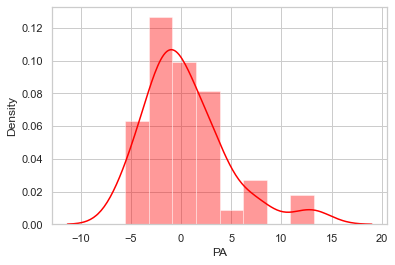

In [206]:
sns.distplot(differences_backs, color = 'Red')

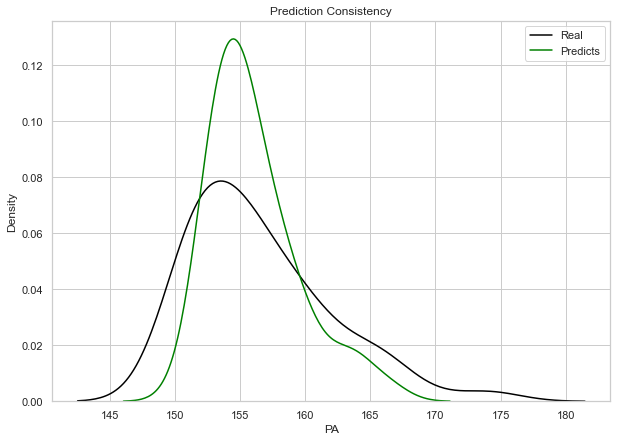

In [207]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(gbr_backs_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA', ylabel='PA'>

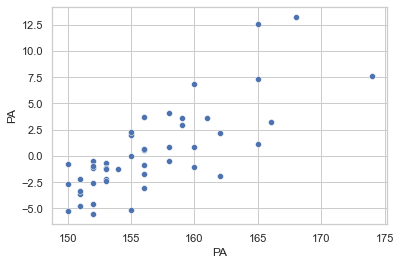

In [208]:
sns.scatterplot(backs_model_reg_P.PA, differences_backs)

In [209]:
backs_model_reg_P

,Height,Weight,Age,CA,PA,Wor,Vis,Tec,Tea,Tck,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,180,70,20,159,178,15,16,17,15,13,...,14,14,15,14,15,14,1,1,0,1
1,186,82,37,102,175,8,1,1,6,1,...,7,7,6,14,8,12,1,0,0,1
2,170,68,36,155,174,16,15,16,15,14,...,17,12,15,12,17,14,1,1,0,1
3,178,72,27,168,174,17,13,15,18,12,...,13,14,16,14,13,16,1,1,1,0
4,176,70,24,171,173,17,16,15,18,14,...,14,13,17,15,12,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,187,80,28,145,150,13,11,15,13,13,...,15,12,16,13,12,15,1,1,0,1
138,181,67,23,130,150,14,14,12,15,12,...,17,13,12,12,9,14,1,1,1,0
139,176,67,28,138,150,16,9,13,16,16,...,14,15,12,15,12,15,1,1,0,1
140,171,64,21,120,150,15,13,13,13,13,...,12,12,12,14,12,15,1,0,1,0


In [210]:
df_backs_errors = backs.iloc[0:142,:]

In [211]:
df_backs_errors = df_backs_errors.loc[x_test_P.index]

In [212]:
df_backs_errors["Errors"] = differences_backs
df_backs_errors["Predictions"] = gbr_backs_P_predicts

In [213]:
df_backs_errors

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Bra,Bal,Ant,Agi,Agg,Acc,P_Quality,C_Quality,Errors,Predictions
61,Juan Bernat,Paris SG,Ligue 1 Conforama,172,67,26,Left Only,D (L),146,156,...,15,15,13,17,17,17,1,1,0.537064,155.462936
52,Nacho,R. Madrid,Spanish First Division,180,77,29,Right,D (R),150,158,...,13,14,15,13,15,16,1,1,0.805990,157.194010
70,Branislav Ivanovic,Zenit,Russian Premier League,185,90,35,Right,D (R),139,155,...,19,13,15,8,14,10,1,1,1.972310,153.027690
26,Dani Carvajal,R. Madrid,Spanish First Division,173,74,27,Right,D (R),156,162,...,18,17,14,14,17,16,1,1,-1.907095,163.907095
92,Mario Gaspar,Villarreal,Spanish First Division,182,74,28,Right,D (R),144,153,...,14,13,15,14,13,14,1,1,-2.149927,155.149927
17,JoÃ£o Cancelo,Man City,English Premier Division,182,74,25,Right,WB (R),158,165,...,12,14,14,16,12,16,1,1,1.142584,163.857416
32,Bacary Sagna,Unknown,Unknown,176,73,36,Right,D (R),118,160,...,13,13,13,10,12,10,1,0,6.852812,153.147188
28,Kieran Tierney,Arsenal,English Premier Division,178,76,22,Left,D (L),145,162,...,17,14,13,15,15,16,1,1,2.173521,159.826479
133,Eugene Cheberko,Zorya,Ukrainian Premier League,177,66,21,Left,D (L),115,150,...,11,13,11,12,9,13,1,0,-5.248996,155.248996
87,Benjamin Henrichs,RB Leipzig,Bundesliga,183,70,22,Right,D (R),130,153,...,11,13,12,14,11,13,1,1,-0.661948,153.661948


## Goalkeepers

<AxesSubplot:title={'center':'Goalkeepers Potential Ability Distribution'}, xlabel='PA', ylabel='Density'>

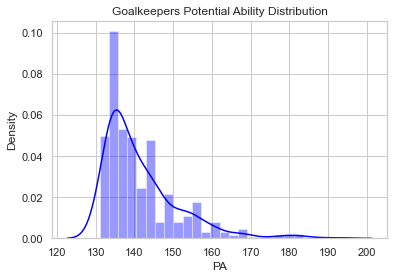

In [214]:
plt.title("Goalkeepers Potential Ability Distribution")
sns.distplot(goalkeepers_model.PA, color = 'Blue')

In [215]:
goalkeepers_model[goalkeepers_model["PA"]>=150]

,Height,Weight,Age,CA,PA,Wor,Vis,Thr,Tea,Str,...,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,192,90,33,176,193,14,12,19,18,16,...,14,19,15,8,14,13,1,1,1,1
1,192,92,41,156,187,12,7,13,17,13,...,13,17,7,5,14,6,1,1,0,1
2,187,85,27,170,183,10,9,17,14,15,...,16,17,14,11,13,14,1,1,1,1
3,199,96,27,162,183,10,10,15,14,13,...,14,15,12,8,18,11,1,1,1,0
4,196,90,20,160,182,13,8,12,16,16,...,16,16,16,8,16,9,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,186,85,30,142,150,13,11,14,14,12,...,14,14,13,8,12,11,1,1,0,1
99,190,83,30,135,150,10,12,11,12,12,...,13,15,12,9,15,13,1,1,0,1
100,190,80,32,142,150,11,13,15,11,13,...,14,13,13,6,14,10,1,1,0,1
101,190,90,25,128,150,12,9,13,13,15,...,12,14,16,12,13,14,1,1,0,1


In [216]:
for i in range(len(goalkeepers_model)):
    if goalkeepers_model["CA"][i]>=125:
        goalkeepers_model["C_Quality"][i]=1
    else:
        goalkeepers_model["C_Quality"][i]=0



for i in range(len(goalkeepers_model)):
    if goalkeepers_model["PA"][i]>=150:
        goalkeepers_model["P_Quality"][i]=1
    else:
        goalkeepers_model["P_Quality"][i]=0

In [217]:
goalkeepers_model.corr()["P_Quality"].sort_values()

Preferred Foot_Right   -0.023424
Age                     0.006354
Vis                     0.018206
Pun                     0.022187
Pac                     0.022697
Agg                     0.024584
OtB                     0.027026
Preferred Foot_Left     0.039421
Weight                  0.047183
Acc                     0.053274
Wor                     0.067120
Ecc                     0.071578
Aer                     0.075516
Kic                     0.080280
Height                  0.083403
Str                     0.090386
Bal                     0.101728
Sta                     0.115595
Jum                     0.119191
Tea                     0.125779
Ldr                     0.130138
Thr                     0.146575
Nat                     0.149262
Fir                     0.158846
Det                     0.204596
TRO                     0.211881
Agi                     0.218099
Bra                     0.230628
Com                     0.233057
Cmd                     0.249842
Pos       

In [218]:
x_goalkeepers = goalkeepers_model.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_goalkeepers_p = goalkeepers_model["P_Quality"]

In [219]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_goalkeepers, y_goalkeepers_p, test_size=0.33, random_state=51)

### Classifying

In [220]:
gbc_goalkeepers_p = GradientBoostingClassifier().fit(x_train_p, y_train_p)

In [221]:
gbc_goalkeepers_p_predicts = gbc_goalkeepers_p.predict(x_test_p)

In [222]:
gbc_goalkeepers_p_cm = confusion_matrix(y_test_p, gbc_goalkeepers_p_predicts)
print("\nCatBoost Classifier P Quality Confusion Matrix:\n")
print(gbc_goalkeepers_p_cm)


CatBoost Classifier P Quality Confusion Matrix:

[[157   2]
 [ 12  18]]


In [223]:
print(classification_report(y_test_p, gbc_goalkeepers_p_predicts, target_names=target_names))

              precision    recall  f1-score   support

   Low Level       0.93      0.99      0.96       159
  High Level       0.90      0.60      0.72        30

    accuracy                           0.93       189
   macro avg       0.91      0.79      0.84       189
weighted avg       0.92      0.93      0.92       189



In [224]:
'''
max_f1=0
best_i=0
for i in range(0,1000):
    
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_goalkeepers, y_goalkeepers_p, test_size=0.33, random_state=i)
    cb_goalkeepers_p = GradientBoostingClassifier()
    cb_goalkeepers_p.fit(x_train_p, y_train_p)
    cb_goalkeepers_p_predicts = cb_goalkeepers_p.predict(x_test_p)
    
    cb_goalkeepers_p_cm = confusion_matrix(y_test_p, cb_goalkeepers_p_predicts)
    p=(cb_goalkeepers_p_cm[1][1]/(cb_goalkeepers_p_cm[0][1]+cb_goalkeepers_p_cm[1][1]))
    r=(cb_goalkeepers_p_cm[1][1]/(cb_goalkeepers_p_cm[1][0]+cb_goalkeepers_p_cm[1][1]))
    f1=(2*p*r)/(p+r)
    if f1>max_f1:
        max_f1=f1
        best_i=i
        if max_f1>0.57:
            print(max_f1, "which random state:", best_i)
print("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)
'''

'\nmax_f1=0\nbest_i=0\nfor i in range(0,1000):\n    \n    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_goalkeepers, y_goalkeepers_p, test_size=0.33, random_state=i)\n    cb_goalkeepers_p = GradientBoostingClassifier()\n    cb_goalkeepers_p.fit(x_train_p, y_train_p)\n    cb_goalkeepers_p_predicts = cb_goalkeepers_p.predict(x_test_p)\n    \n    cb_goalkeepers_p_cm = confusion_matrix(y_test_p, cb_goalkeepers_p_predicts)\n    p=(cb_goalkeepers_p_cm[1][1]/(cb_goalkeepers_p_cm[0][1]+cb_goalkeepers_p_cm[1][1]))\n    r=(cb_goalkeepers_p_cm[1][1]/(cb_goalkeepers_p_cm[1][0]+cb_goalkeepers_p_cm[1][1]))\n    f1=(2*p*r)/(p+r)\n    if f1>max_f1:\n        max_f1=f1\n        best_i=i\n        if max_f1>0.57:\n            print(max_f1, "which random state:", best_i)\nprint("\nBest f1 score for class 1:",max_f1, "\nrandom state:", best_i)\n'

### Regression

In [225]:
goalkeepers_model_reg_P = goalkeepers_model[goalkeepers_model["PA"]>=150]

In [226]:
x_goalkeepers_reg = goalkeepers_model_reg_P.drop(columns=["CA", "PA", "P_Quality", "C_Quality"])
y_goalkeepers_P = goalkeepers_model_reg_P["PA"]
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_goalkeepers_reg, y_goalkeepers_P, test_size=0.33, random_state=891)

In [227]:
xgb_goalkeepers_P = XGBRegressor().fit(x_train_P, y_train_P)

In [228]:
xgb_goalkeepers_P_predicts = xgb_goalkeepers_P.predict(x_test_P)
metrics.mean_absolute_error(y_test_P, xgb_goalkeepers_P_predicts) 

3.827513302073759

In [229]:
'''
min_mae=100
for i in range (0, 1000):
    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_goalkeepers_reg, y_goalkeepers_P, test_size=0.33, random_state=i)
    gbr_goalkeepers_P = XGBRegressor().fit(x_train_P, y_train_P)
    gbr_goalkeepers_P_predicts = gbr_goalkeepers_P.predict(x_test_P)
    mae =metrics.mean_absolute_error(y_test_P, gbr_goalkeepers_P_predicts)
    
    if mae<4.84:
        print(metrics.mean_absolute_error(y_test_P, gbr_goalkeepers_P_predicts), i)
        
        if mae<min_mae:
            min_mae=mae
            best_i=i
        
print("\nBest mae :",min_mae, "\nbest random state", best_i)
'''

'\nmin_mae=100\nfor i in range (0, 1000):\n    x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_goalkeepers_reg, y_goalkeepers_P, test_size=0.33, random_state=i)\n    gbr_goalkeepers_P = XGBRegressor().fit(x_train_P, y_train_P)\n    gbr_goalkeepers_P_predicts = gbr_goalkeepers_P.predict(x_test_P)\n    mae =metrics.mean_absolute_error(y_test_P, gbr_goalkeepers_P_predicts)\n    \n    if mae<4.84:\n        print(metrics.mean_absolute_error(y_test_P, gbr_goalkeepers_P_predicts), i)\n        \n        if mae<min_mae:\n            min_mae=mae\n            best_i=i\n        \nprint("\nBest mae :",min_mae, "\nbest random state", best_i)\n'

In [230]:
differences_goalkeepers = y_test_P- xgb_goalkeepers_P_predicts

<AxesSubplot:xlabel='PA', ylabel='Density'>

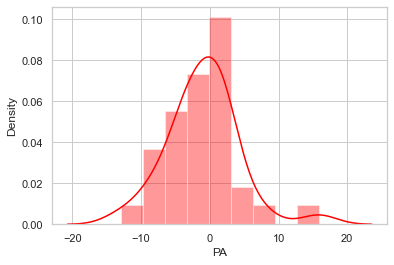

In [231]:
sns.distplot(differences_goalkeepers, color = 'Red')

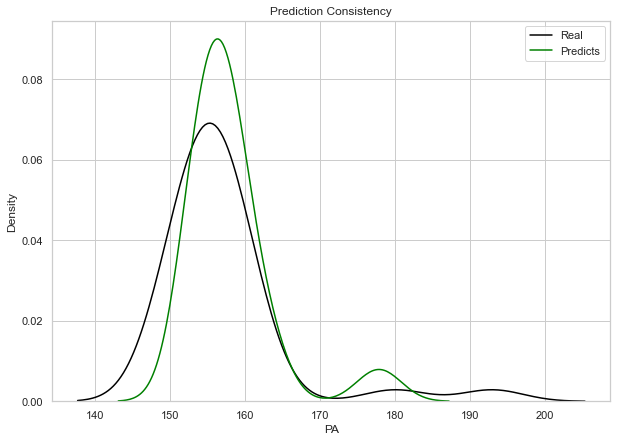

In [232]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(xgb_goalkeepers_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PA', ylabel='PA'>

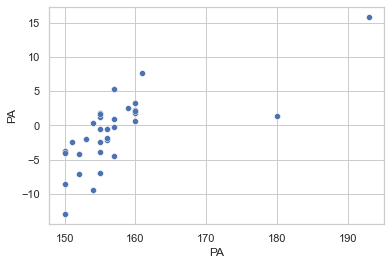

In [233]:
sns.scatterplot(goalkeepers_model_reg_P.PA, differences_goalkeepers)

In [234]:
goalkeepers_model_reg_P

,Height,Weight,Age,CA,PA,Wor,Vis,Thr,Tea,Str,...,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality,Preferred Foot_Left,Preferred Foot_Right
0,192,90,33,176,193,14,12,19,18,16,...,14,19,15,8,14,13,1,1,1,1
1,192,92,41,156,187,12,7,13,17,13,...,13,17,7,5,14,6,1,1,0,1
2,187,85,27,170,183,10,9,17,14,15,...,16,17,14,11,13,14,1,1,1,1
3,199,96,27,162,183,10,10,15,14,13,...,14,15,12,8,18,11,1,1,1,0
4,196,90,20,160,182,13,8,12,16,16,...,16,16,16,8,16,9,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,186,85,30,142,150,13,11,14,14,12,...,14,14,13,8,12,11,1,1,0,1
99,190,83,30,135,150,10,12,11,12,12,...,13,15,12,9,15,13,1,1,0,1
100,190,80,32,142,150,11,13,15,11,13,...,14,13,13,6,14,10,1,1,0,1
101,190,90,25,128,150,12,9,13,13,15,...,12,14,16,12,13,14,1,1,0,1


In [235]:
df_goalkeepers_errors = goalkeepers.iloc[0:103,:]

In [236]:
df_goalkeepers_errors = df_goalkeepers_errors.loc[x_test_P.index]

In [237]:
df_goalkeepers_errors["Errors"] = differences_goalkeepers
df_goalkeepers_errors["Predictions"] = xgb_goalkeepers_P_predicts

In [238]:
df_goalkeepers_errors

,Name,Club,Division,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,...,Bal,Ant,Agi,Agg,Aer,Acc,P_Quality,C_Quality,Errors,Predictions
44,Alban Lafont,FC Nantes,Ligue 1 Conforama,193,82,20,Right Only,GK,130,156,...,14,13,14,7,14,11,1,1,-2.203598,158.203598
0,Manuel Neuer,FC Bayern,Bundesliga,192,90,33,Either,GK,176,193,...,14,19,15,8,14,13,1,1,15.841858,177.158142
40,Pontus Dahlberg,FC Emmen,Eredivisie,194,84,20,Right Only,GK,114,157,...,10,12,14,13,13,8,1,0,0.933853,156.066147
58,Mattia Perin,Genoa,Italian Serie A,188,74,26,Right Only,GK,143,155,...,13,14,15,10,12,13,1,1,1.583786,153.416214
5,Alisson,Liverpool,English Premier Division,191,91,26,Right,GK,174,180,...,16,15,15,12,14,15,1,1,1.420471,178.579529
86,Tom Heaton,Aston Villa,English Premier Division,188,86,33,Right,GK,137,151,...,10,13,12,7,14,8,1,1,-2.453705,153.453705
62,Alphonse Areola,Fulham,English Premier Division,195,94,26,Right,GK,150,154,...,17,14,14,8,14,12,1,1,0.311737,153.688263
78,Dani MartÃ­n,Real Betis,Spanish First Division,187,77,20,Right,GK,120,152,...,8,11,11,13,11,11,1,0,-7.024048,159.024048
24,Jack Butland,Crystal Palace,English Premier Division,196,94,26,Right,GK,124,161,...,12,12,16,10,15,12,1,0,7.642563,153.357437
81,Tim Krul,Norwich,Sky Bet Championship,194,83,31,Left Only,GK,132,152,...,14,12,13,11,15,11,1,1,-4.156281,156.156281


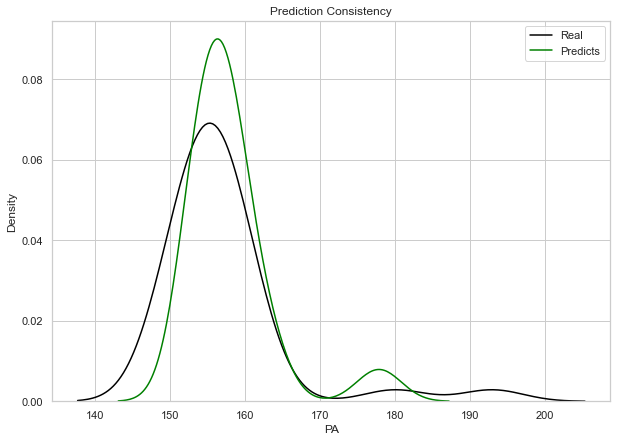

In [239]:
plt.figure(figsize=(10, 7))
plt.title("Prediction Consistency")
sns.distplot(y_test_P, hist=False, color='black', label = "Real")
sns.distplot(xgb_goalkeepers_P_predicts, hist=False, color='green', label='Predicts')
plt.legend()
plt.show()

# Result

In [244]:
data = {"Algorithm": ["Gradient Boosting Regressor", "Cat Boost Regressor", "LightGBM Regressor", "Gradient Boosting Regressor", "XGB Regressor"],
        "Position": ["Forwards", "Midfielders", "Defenders", "Backs", "Goalkeepers"],
        "Mean Absolute Error": [4.52, 4.44, 3.47, 3.02, 3.83]
        
        }

result = pd.DataFrame(data)

result

,Algorithm,Position,Mean Absolute Error
0,Gradient Boosting Regressor,Forwards,4.52
1,Cat Boost Regressor,Midfielders,4.44
2,LightGBM Regressor,Defenders,3.47
3,Gradient Boosting Regressor,Backs,3.02
4,XGB Regressor,Goalkeepers,3.83
